In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
data = pd.read_csv(r'C:\Users\user\Desktop\Projects\AI psychotherapy\Research - AI in Psychotherapy.csv')

data

,1. How likely are you to seek advice from an AI chatbot for mental health issues?,2. Rate your level of trust in AI-driven mental health applications to protect your privacy and data?,3. How concerned are you as a patient about the potential loss of the human connection in psychotherapy when using AI-driven tools?,"4. In your opinion, what are the potential benefits of using AI in healthcare?",5. What do you consider the most significant challenges in using AI for psychotherapy or mental health support?,"6. In scenarios where AI-based diagnostics differ from traditional assessments, how concerned are you about the accuracy and ethical implications?","7. In your experience, have you ever encountered any AI-based mental health applications that effectively addressed your psychological or emotional needs? If yes, how satisfied have you been with the personalization and customization of AI-based mental health services you've used?",8. Do you believe that AI can play a role in reducing the stigma associated with seeking mental health support?,"9. What amount of time do you currently dedicate to managing your mental health, and how do you envision AI accessibility might impact the time you allocate to mental health practices in the future?","10. Do you believe that if AI achieves human-level intellect, there is a risk that AI systems will like contribute to the emergence of new mental health problems?","11. Will the implementation of AI in therapy impact the cost of mental health services, such as through subscription-based models or other cost-reduction methods within AI-driven mental health solutions?",Submission ID
0,4,3,3,Streamlined administrative tasks,Limited personalization,8,1,YES,More than 4 hrs/per week,3,YES,5753647039679430000
1,5,3,6,Faster and more efficient healthcare delivery,Lack of human understanding and empathy,4,4,YES,0-2 hrs/per week,4,YES,5753742906619650000
2,3,6,9,Streamlined administrative tasks\nFaster and m...,Lack of human understanding and empathy\nLack ...,8,9,NO,More than 4 hrs/per week,7,YES,5753745379123040000
3,7,10,6,Enhanced treatment planning\nImproved accuracy...,Lack of human understanding and empathy\nAlgor...,7,5,YES,0-2 hrs/per week,10,YES,5753767994212100000
4,5,3,5,No significant benefits,Lack of human understanding and empathy\nEthic...,5,1,NO,0-2 hrs/per week,1,YES,5753768864511200000
...,...,...,...,...,...,...,...,...,...,...,...,...
105,10,7,9,Enhanced treatment planning\nFaster and more e...,Lack of human understanding and empathy\nLack ...,7,5,NO,0-2 hrs/per week,7,YES,5754943525134280000
106,6,1,10,Streamlined administrative tasks\nNo significa...,Lack of human understanding and empathy\nEthic...,6,4,YES,2-4 hrs/per week,10,NO,5755175000195730000
107,1,1,10,Faster and more efficient healthcare delivery,Lack of human understanding and empathy,1,4,YES,2-4 hrs/per week,3,YES,5755185627159870000
108,3,8,9,Faster and more efficient healthcare delivery,Lack of human understanding and empathy,5,6,YES,2-4 hrs/per week,8,YES,5755224757367570000


In [2]:
data.drop(['Submission ID'],axis=1)

,1. How likely are you to seek advice from an AI chatbot for mental health issues?,2. Rate your level of trust in AI-driven mental health applications to protect your privacy and data?,3. How concerned are you as a patient about the potential loss of the human connection in psychotherapy when using AI-driven tools?,"4. In your opinion, what are the potential benefits of using AI in healthcare?",5. What do you consider the most significant challenges in using AI for psychotherapy or mental health support?,"6. In scenarios where AI-based diagnostics differ from traditional assessments, how concerned are you about the accuracy and ethical implications?","7. In your experience, have you ever encountered any AI-based mental health applications that effectively addressed your psychological or emotional needs? If yes, how satisfied have you been with the personalization and customization of AI-based mental health services you've used?",8. Do you believe that AI can play a role in reducing the stigma associated with seeking mental health support?,"9. What amount of time do you currently dedicate to managing your mental health, and how do you envision AI accessibility might impact the time you allocate to mental health practices in the future?","10. Do you believe that if AI achieves human-level intellect, there is a risk that AI systems will like contribute to the emergence of new mental health problems?","11. Will the implementation of AI in therapy impact the cost of mental health services, such as through subscription-based models or other cost-reduction methods within AI-driven mental health solutions?"
0,4,3,3,Streamlined administrative tasks,Limited personalization,8,1,YES,More than 4 hrs/per week,3,YES
1,5,3,6,Faster and more efficient healthcare delivery,Lack of human understanding and empathy,4,4,YES,0-2 hrs/per week,4,YES
2,3,6,9,Streamlined administrative tasks\nFaster and m...,Lack of human understanding and empathy\nLack ...,8,9,NO,More than 4 hrs/per week,7,YES
3,7,10,6,Enhanced treatment planning\nImproved accuracy...,Lack of human understanding and empathy\nAlgor...,7,5,YES,0-2 hrs/per week,10,YES
4,5,3,5,No significant benefits,Lack of human understanding and empathy\nEthic...,5,1,NO,0-2 hrs/per week,1,YES
...,...,...,...,...,...,...,...,...,...,...,...
105,10,7,9,Enhanced treatment planning\nFaster and more e...,Lack of human understanding and empathy\nLack ...,7,5,NO,0-2 hrs/per week,7,YES
106,6,1,10,Streamlined administrative tasks\nNo significa...,Lack of human understanding and empathy\nEthic...,6,4,YES,2-4 hrs/per week,10,NO
107,1,1,10,Faster and more efficient healthcare delivery,Lack of human understanding and empathy,1,4,YES,2-4 hrs/per week,3,YES
108,3,8,9,Faster and more efficient healthcare delivery,Lack of human understanding and empathy,5,6,YES,2-4 hrs/per week,8,YES


In [3]:
multichoice_1=data['4. In your opinion, what are the potential benefits of using AI in healthcare?']
removed_data=data.drop(['4. In your opinion, what are the potential benefits of using AI in healthcare?'],axis=1)
multichoice_2=removed_data['5. What do you consider the most significant challenges in using AI for psychotherapy or mental health support?']
final_data=removed_data.drop(['5. What do you consider the most significant challenges in using AI for psychotherapy or mental health support?'],axis=1)

print(final_data['11. Will the implementation of AI in therapy impact the cost of mental health services, such as through subscription-based models or other cost-reduction methods within AI-driven mental health solutions?'].unique())
print(final_data['8. Do you believe that AI can play a role in reducing the stigma associated with seeking mental health support?'].unique())
print(final_data['9. What amount of time do you currently dedicate to managing your mental health, and how do you envision AI accessibility might impact the time you allocate to mental health practices in the future?'].unique())
final_data.columns=["Q.1", "Q.2", "Q.3", "Q.6", "Q.7", "Q.8", "Q.9", "Q.10", "Q.11", "ID"]

['YES' 'NO']
['YES' 'NO']
['More than 4 hrs/per week' '0-2 hrs/per week' '2-4 hrs/per week']


In [4]:
from sklearn.preprocessing import OneHotEncoder 


final_data['Q.8']=final_data['Q.8'].astype('category') 
final_data['Q.9']=final_data['Q.9'].astype('category') 
final_data['Q.11']=final_data['Q.11'].astype('category') 

final_data['Q.8_new']=final_data['Q.8'].cat.codes
final_data['Q.9_new']=final_data['Q.9'].cat.codes
final_data['Q.11_new']=final_data['Q.11'].cat.codes

enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform( 
    final_data[['Q.8_new', 'Q.9_new','Q.11_new']]).toarray())

final_data

# Yes means 1 no means 0
# More than 4 means 2, 2-4 means 1, 0-2 means 0

,Q.1,Q.2,Q.3,Q.6,Q.7,Q.8,Q.9,Q.10,Q.11,ID,Q.8_new,Q.9_new,Q.11_new
0,4,3,3,8,1,YES,More than 4 hrs/per week,3,YES,5753647039679430000,1,2,1
1,5,3,6,4,4,YES,0-2 hrs/per week,4,YES,5753742906619650000,1,0,1
2,3,6,9,8,9,NO,More than 4 hrs/per week,7,YES,5753745379123040000,0,2,1
3,7,10,6,7,5,YES,0-2 hrs/per week,10,YES,5753767994212100000,1,0,1
4,5,3,5,5,1,NO,0-2 hrs/per week,1,YES,5753768864511200000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,10,7,9,7,5,NO,0-2 hrs/per week,7,YES,5754943525134280000,0,0,1
106,6,1,10,6,4,YES,2-4 hrs/per week,10,NO,5755175000195730000,1,1,0
107,1,1,10,1,4,YES,2-4 hrs/per week,3,YES,5755185627159870000,1,1,1
108,3,8,9,5,6,YES,2-4 hrs/per week,8,YES,5755224757367570000,1,1,1


In [5]:
final_data=final_data.drop(['Q.8','Q.9','Q.11','ID'],axis=1)
final_data.rename(columns = {'Q.8_new':'Q.8','Q.9_new':'Q.9','Q.11_new':'Q.11'},inplace=True)
final_data

,Q.1,Q.2,Q.3,Q.6,Q.7,Q.10,Q.8,Q.9,Q.11
0,4,3,3,8,1,3,1,2,1
1,5,3,6,4,4,4,1,0,1
2,3,6,9,8,9,7,0,2,1
3,7,10,6,7,5,10,1,0,1
4,5,3,5,5,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
105,10,7,9,7,5,7,0,0,1
106,6,1,10,6,4,10,1,1,0
107,1,1,10,1,4,3,1,1,1
108,3,8,9,5,6,8,1,1,1


In [6]:
mc_1=multichoice_1.to_frame(1)
mc_1.columns=['Q.4']
mc_2=multichoice_2.to_frame(1)
mc_2.columns=['Q.5']
full_mc_1=mc_1['Q.4'].str.split("\n",expand=True)
full_mc_2=mc_2['Q.5'].str.split("\n",expand=True)
full_mc_1.columns=["1","2","3","4","5"]
full_mc_2.columns=["1","2","3","4","5"]
pd.unique(full_mc_1[['1', '2','3','4','5']].values.ravel('K'))
#pd.unique(full_mc_2[['1', '2','3','4','5']].values.ravel('K'))

array(['Streamlined administrative tasks',
       'Faster and more efficient healthcare delivery',
       'Enhanced treatment planning', 'No significant benefits',
       'Improved accuracy in diagnosis',
       'For finding the source of information and the physicians using it assimilate their understanding',
       'More profit for the system',
       'Skynet can kill the stupid humans so smart robots take over',
       None,
       'but due to some misinformation input,it can misguide patients too!!'],
      dtype=object)

In [7]:
expand_mc_1=pd.concat([full_mc_1['1'].value_counts().to_frame().transpose()
,full_mc_1['2'].value_counts().to_frame().transpose()
,full_mc_1['3'].value_counts().to_frame().transpose()
,full_mc_1['4'].value_counts().to_frame().transpose()
,full_mc_1['5'].value_counts().to_frame().transpose()],axis=0)
final_mc_1=(expand_mc_1.sum(axis="rows",skipna=True).to_frame())
final_mc_1.columns=["Total number particular option is chosen"]
final_mc_1

,Total number particular option is chosen
Enhanced treatment planning,43.0
No significant benefits,22.0
Faster and more efficient healthcare delivery,55.0
Streamlined administrative tasks,40.0
Improved accuracy in diagnosis,41.0
For finding the source of information and the physicians using it assimilate their understanding,1.0
More profit for the system,1.0
Skynet can kill the stupid humans so smart robots take over,1.0
"but due to some misinformation input,it can misguide patients too!!",1.0


In [8]:
expand_mc_2=pd.concat([full_mc_2['1'].value_counts().to_frame().transpose()
,full_mc_2['2'].value_counts().to_frame().transpose()
,full_mc_2['3'].value_counts().to_frame().transpose()
,full_mc_2['4'].value_counts().to_frame().transpose()
,full_mc_2['5'].value_counts().to_frame().transpose()],axis=0)
final_mc_2=expand_mc_2.sum(axis="rows",skipna=True).to_frame()
final_mc_2.columns=["Total number particular option is chosen"]
final_mc_2

,Total number particular option is chosen
Lack of human understanding and empathy,83.0
Ethical and privacy concerns,42.0
Algorithmic biases,34.0
Limited personalization,40.0
Lack of immediate crisis intervention capability,39.0
None,1.0
AI tends to make shit up.,1.0
Humans can’t comprehend the robots feelings,1.0
Misinformation,1.0


In [9]:
#final mc_1,final mc_2,final_data



final_mc_2.drop('AI tends to make shit up.',axis=0,inplace=True)
final_mc_1.drop('Skynet can kill the stupid humans so smart robots take over',axis=0,inplace=True)

In [10]:
final_mc_1

,Total number particular option is chosen
Enhanced treatment planning,43.0
No significant benefits,22.0
Faster and more efficient healthcare delivery,55.0
Streamlined administrative tasks,40.0
Improved accuracy in diagnosis,41.0
For finding the source of information and the physicians using it assimilate their understanding,1.0
More profit for the system,1.0
"but due to some misinformation input,it can misguide patients too!!",1.0


In [11]:
final_mc_2

,Total number particular option is chosen
Lack of human understanding and empathy,83.0
Ethical and privacy concerns,42.0
Algorithmic biases,34.0
Limited personalization,40.0
Lack of immediate crisis intervention capability,39.0
None,1.0
Humans can’t comprehend the robots feelings,1.0
Misinformation,1.0


In [12]:
final_data

yes_no_q=[final_data['Q.8'],final_data['Q.11']]
time_q=[final_data['Q.9']]
final_data=final_data.drop(['Q.8','Q.11','Q.9'],axis=1)

In [13]:
final_data.describe()

,Q.1,Q.2,Q.3,Q.6,Q.7,Q.10
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,4.518182,4.809091,6.763636,6.472727,4.509091,6.481818
std,2.817806,2.638791,2.732500,2.455883,2.660432,2.741900
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,5.000000,5.000000,2.000000,5.000000
50%,4.000000,5.000000,7.000000,6.000000,5.000000,7.000000
75%,7.000000,7.000000,9.000000,8.000000,6.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [14]:
time_q=(pd.DataFrame(time_q)).transpose()
time_q

,Q.9
0,2
1,0
2,2
3,0
4,0
...,...
105,0
106,1
107,1
108,1


In [15]:
yes_no_q=(pd.DataFrame(yes_no_q)).transpose()
yes_no_q

,Q.8,Q.11
0,1,1
1,1,1
2,0,1
3,1,1
4,0,1
...,...,...
105,0,1
106,1,0
107,1,1
108,1,1


In [16]:
# Multiple choice questions - final_mc_1, final_mc_2
# Linear number rating - final_data
# Yes no q - yes_no_q
# Time dependent q - time_q

Text(0.5, 1.0, 'Heat map between all Linear based Questions')

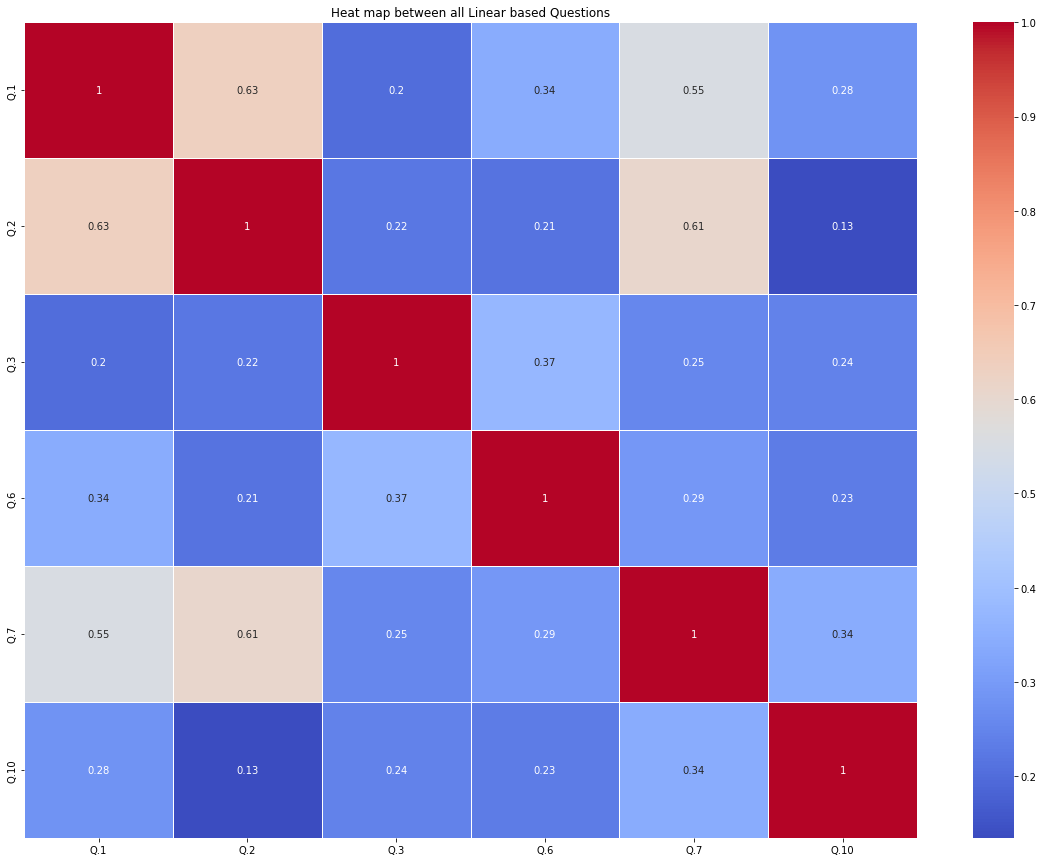

In [81]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,15))
ax=sns.heatmap(final_data.corr(),linewidth=0.5,cmap='coolwarm',annot=True)
plt.title("Heat map between all Linear based Questions")

<function matplotlib.pyplot.show(close=None, block=None)>

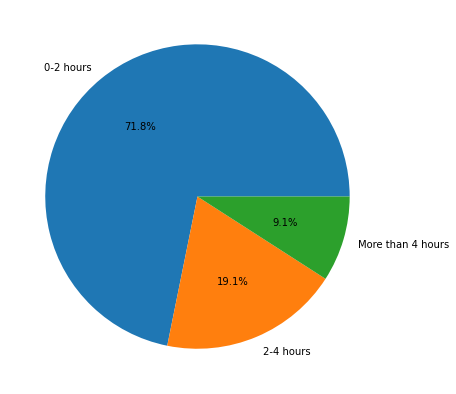

In [18]:
fig = plt.figure(figsize =(10, 7))
data=time_q['Q.9'].values
datat=np.unique(time_q, return_counts=True)
dataf=pd.DataFrame(datat)
dataf=(dataf.transpose())
dataf.columns=['Encoded values','Frequency']
dataf
plt.pie(dataf['Frequency'],labels=['0-2 hours','2-4 hours','More than 4 hours'],autopct='%1.1f%%')
plt.show

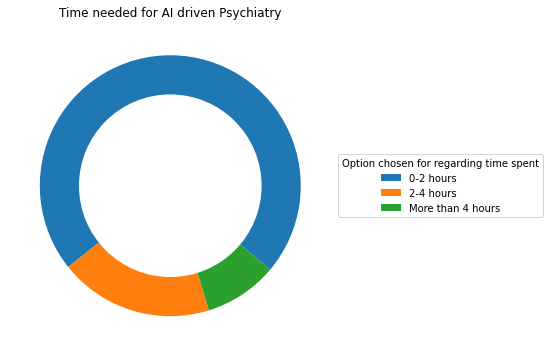

In [19]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(dataf['Frequency'], wedgeprops=dict(width=0.5), startangle=-40)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
labels=['0-2 hours','2-4 hours','More than 4 hours']
ax.legend(wedges, labels,
      title="Option chosen for regarding time spent",
      loc="center left",
      bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(texts, size=12, weight="bold")

ax.set_title("Time needed for AI driven Psychiatry")

plt.show()

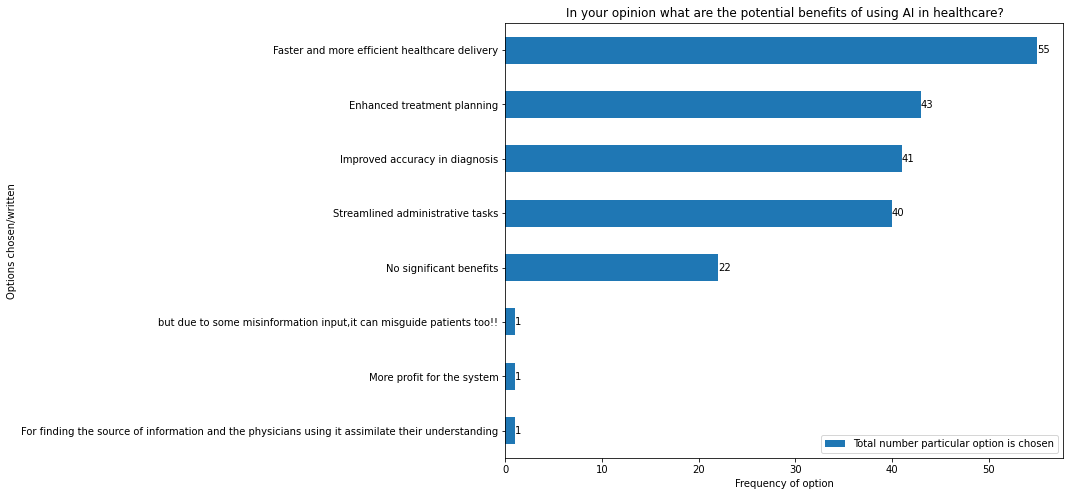

In [20]:
ax=final_mc_1.sort_values('Total number particular option is chosen').plot(kind='barh',figsize=(10,8))
plt.ylabel("Options chosen/written")
plt.xlabel("Frequency of option")
plt.title("In your opinion what are the potential benefits of using AI in healthcare?")
for container in ax.containers:
    ax.bar_label(container)

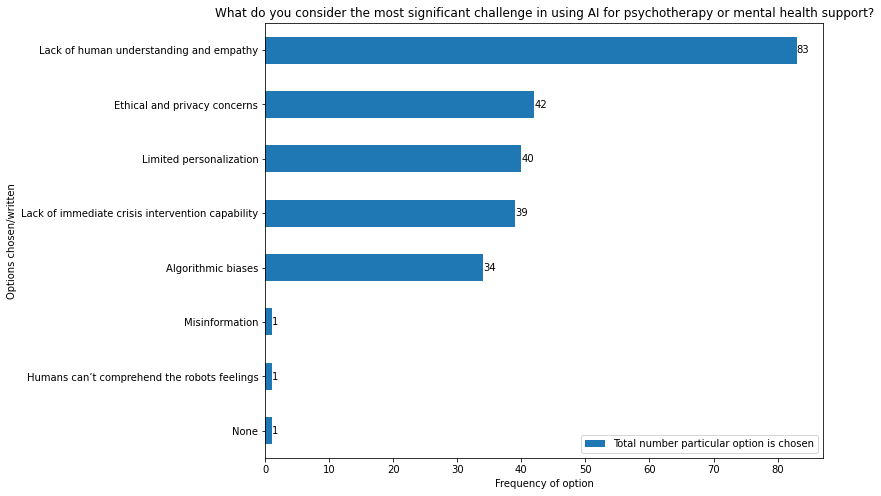

In [21]:
ax=final_mc_2.sort_values('Total number particular option is chosen').plot(kind='barh',figsize=(10,8))
plt.ylabel("Options chosen/written")
plt.xlabel("Frequency of option")
plt.title("What do you consider the most significant challenge in using AI for psychotherapy or mental health support?")
for container in ax.containers:
    ax.bar_label(container)

In [22]:
for i in final_data.columns:
    print(f"{i} Percentage of occurences\n")
    print(final_data[i].value_counts(normalize=True))
    print("\n*********************************************************************\n")

Q.1 Percentage of occurences

1     0.227273
4     0.136364
7     0.127273
5     0.109091
8     0.109091
3     0.100000
2     0.072727
10    0.063636
6     0.045455
9     0.009091
Name: Q.1, dtype: float64

*********************************************************************

Q.2 Percentage of occurences

5     0.154545
1     0.136364
4     0.118182
3     0.109091
7     0.109091
6     0.100000
2     0.100000
8     0.081818
10    0.063636
9     0.027273
Name: Q.2, dtype: float64

*********************************************************************

Q.3 Percentage of occurences

10    0.218182
8     0.163636
9     0.109091
5     0.109091
6     0.090909
7     0.081818
3     0.072727
4     0.072727
1     0.045455
2     0.036364
Name: Q.3, dtype: float64

*********************************************************************

Q.6 Percentage of occurences

6     0.181818
8     0.145455
5     0.145455
10    0.136364
7     0.100000
9     0.100000
4     0.072727
3     0.054545
1     0.054545
2

Text(0.5, 1.0, 'Scores of Linear Score based Questions')

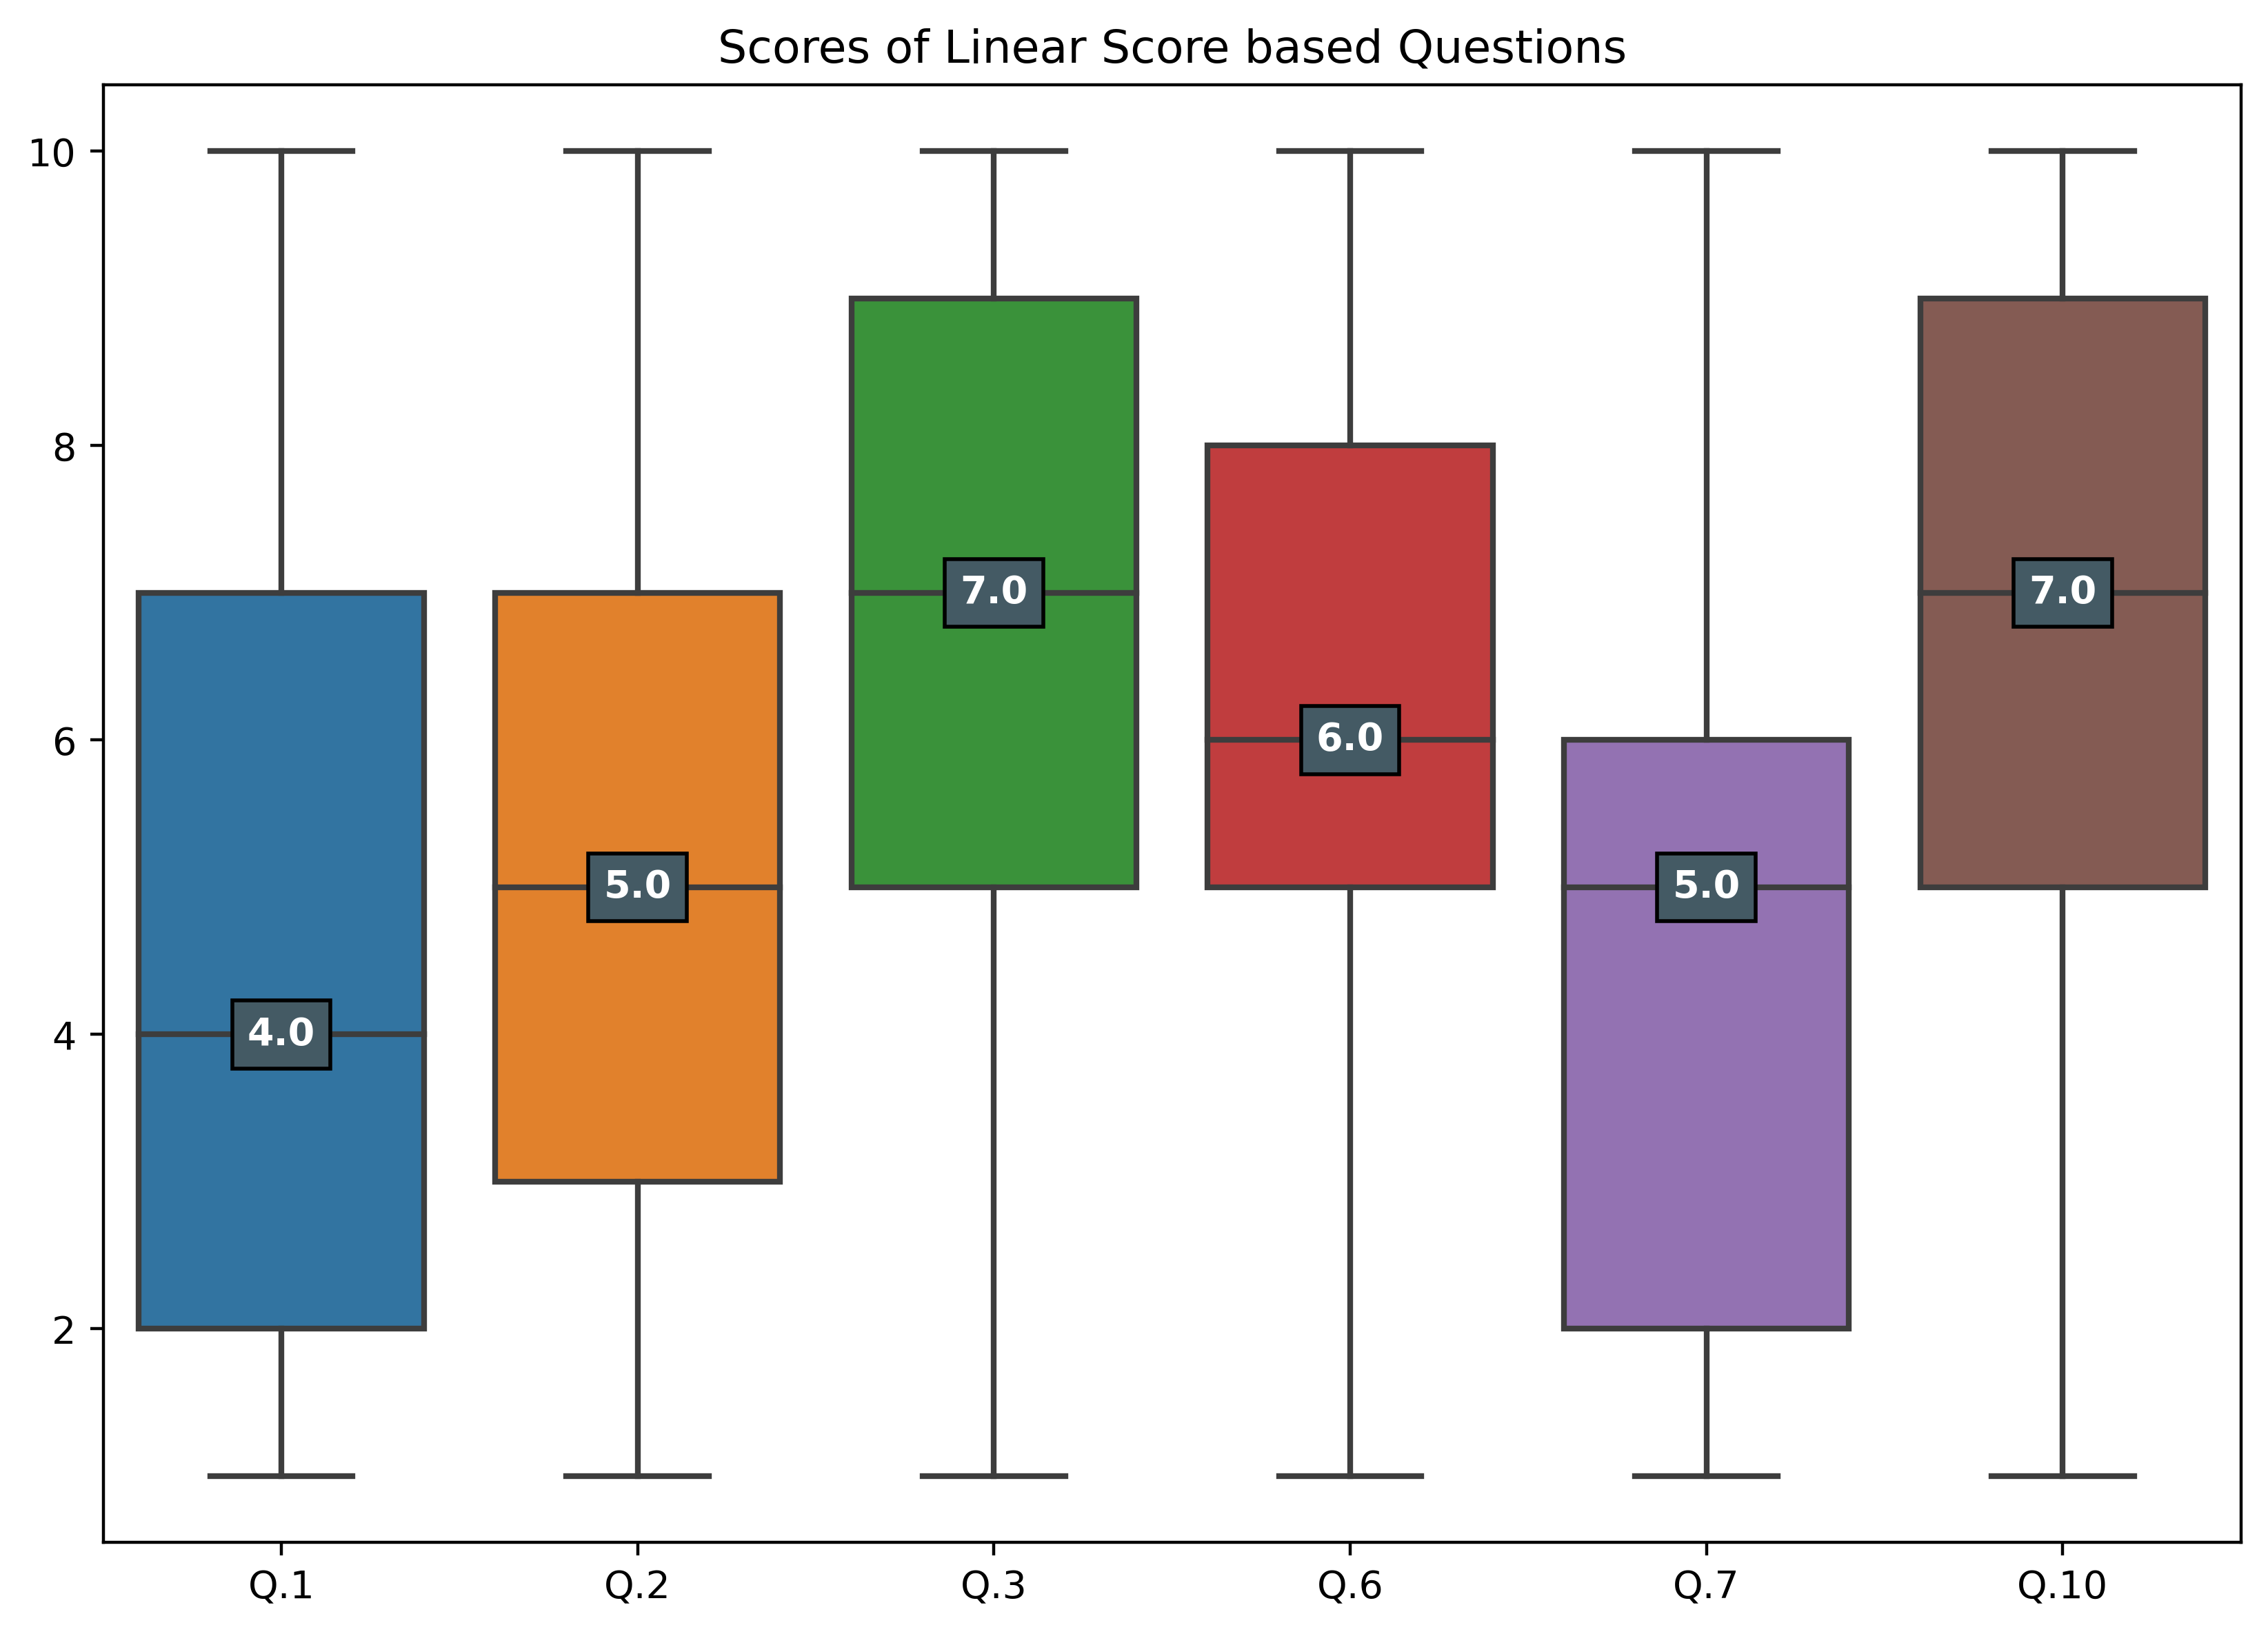

In [23]:
plt.figure(figsize=(10,7),dpi=400)
box_plot = sns.boxplot(data=final_data)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(cat, y, f'{y}',ha='center', va='center', fontweight='bold', size=10,color='white',bbox=dict(facecolor='#445A64'))
plt.title("Scores of Linear Score based Questions")

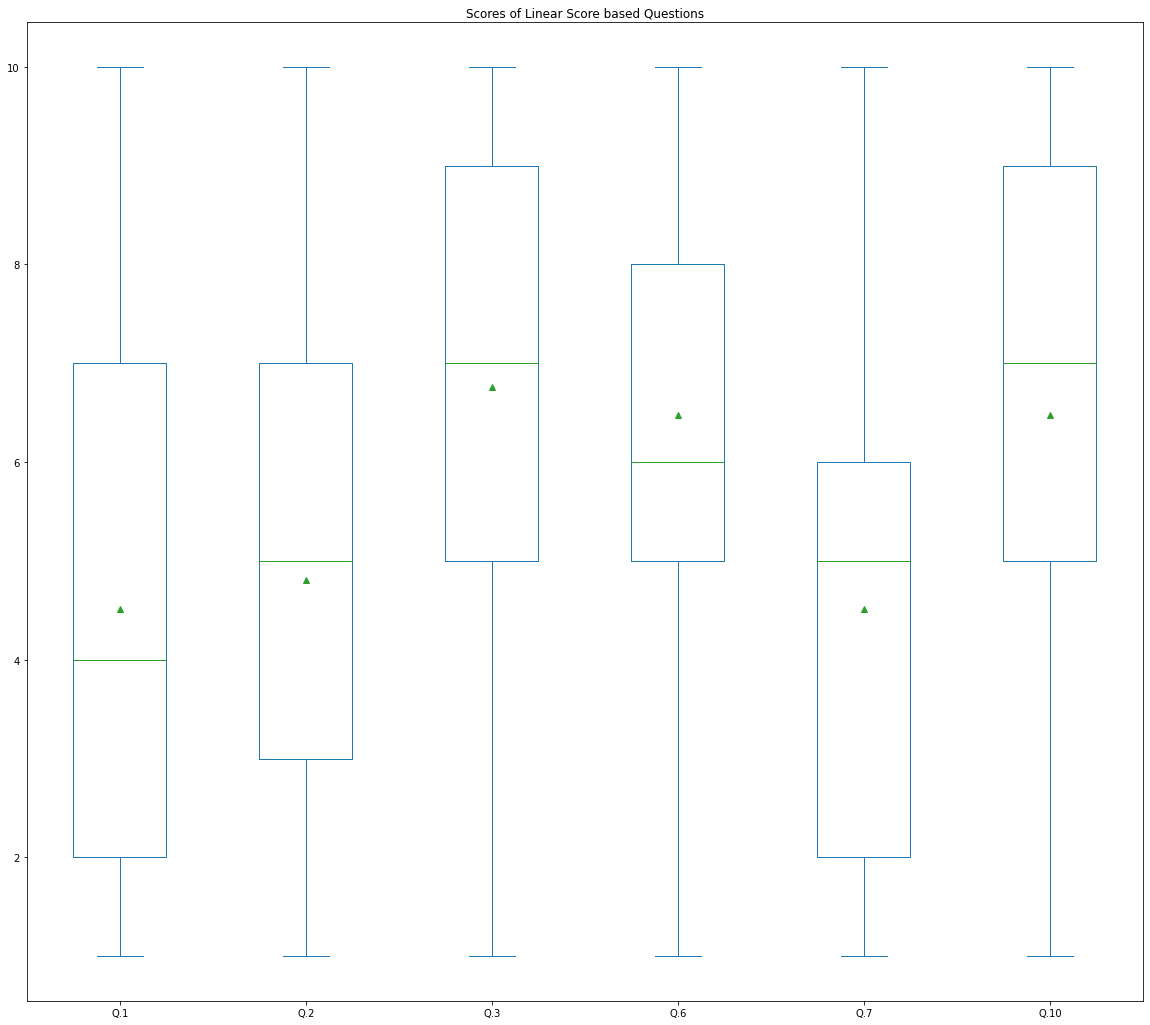

In [24]:
ax = final_data.plot(kind='box', title='Visual representation about Data',showmeans=True,figsize=(20,18))
plt.title("Scores of Linear Score based Questions")
for i in ax.containers:
    ax.bar_label(i)

# Insights

Insights -<br>
1.Trust in AI driven Psychotherapy = Q.1,Q.2,Q.5,Q.6,Q.8<br>
2.Attitudes Toward Integrating AI Technology = Q.1, Q.3,Q.4,Q.10<br>
3.Public Awareness = Q.1,Q.5,Q.7,Q.8,Q.9,Q.10<br>
4.Impact on Human-to-Human Therapeutic Relationship = Q.3,Q.5,Q.6,Q.9<br>
5.Economic Implications = Q.4,Q.7,Q.8,Q.11<br>




Questions<br>
final_data=Q.1,Q.2,Q.3,Q.6,Q.7,Q.10<br>
yes_no_q=Q.8,Q.11<br>
time_q=Q.9<br>
full_mc_1=Q.4<br>
full_mc_2=Q.5<br>

In [25]:
trust=pd.DataFrame([final_data['Q.1'],final_data['Q.2'],final_data['Q.6'],yes_no_q['Q.8']]).transpose()
#Q.6 has opposite connotations to trust in AI, hence finding its in opposite linear scale might help in grading
trust['Q.6']=10-trust['Q.6']
trust['mean']=(trust['Q.1']+trust['Q.2']+trust['Q.6'])/3
#Q.5 will be dealt seperately



att=pd.DataFrame([final_data['Q.1'],final_data['Q.3'],final_data['Q.10']]).transpose()
#Q.3 and Q.10 has opposite connotation to the idea of positive attitute hence finding its converse in  linear scale might help in grading
att['Q.3']=10-att['Q.3']
att['Q.10']=10-att['Q.10']
att['mean']=(att['Q.1']+att['Q.3']+att['Q.10'])/3
#Q.4 will be dealt seperately



aware=pd.DataFrame([final_data['Q.1'],final_data['Q.7'],final_data['Q.10'],yes_no_q['Q.8'],time_q['Q.9']]).transpose()
aware['mean']=(aware['Q.1']+aware['Q.7']+aware['Q.10'])/3
#Q.5 will be dealt seperately


impact=pd.DataFrame([final_data['Q.3'],final_data['Q.6'],time_q['Q.9']]).transpose()
impact['mean']=(impact['Q.3']+impact['Q.6'])/2
#Q.5 will be dealt seperately



econ=pd.DataFrame([final_data['Q.7'],yes_no_q['Q.11']]).transpose()
#Q.4 will be dealt seperately

## Trust

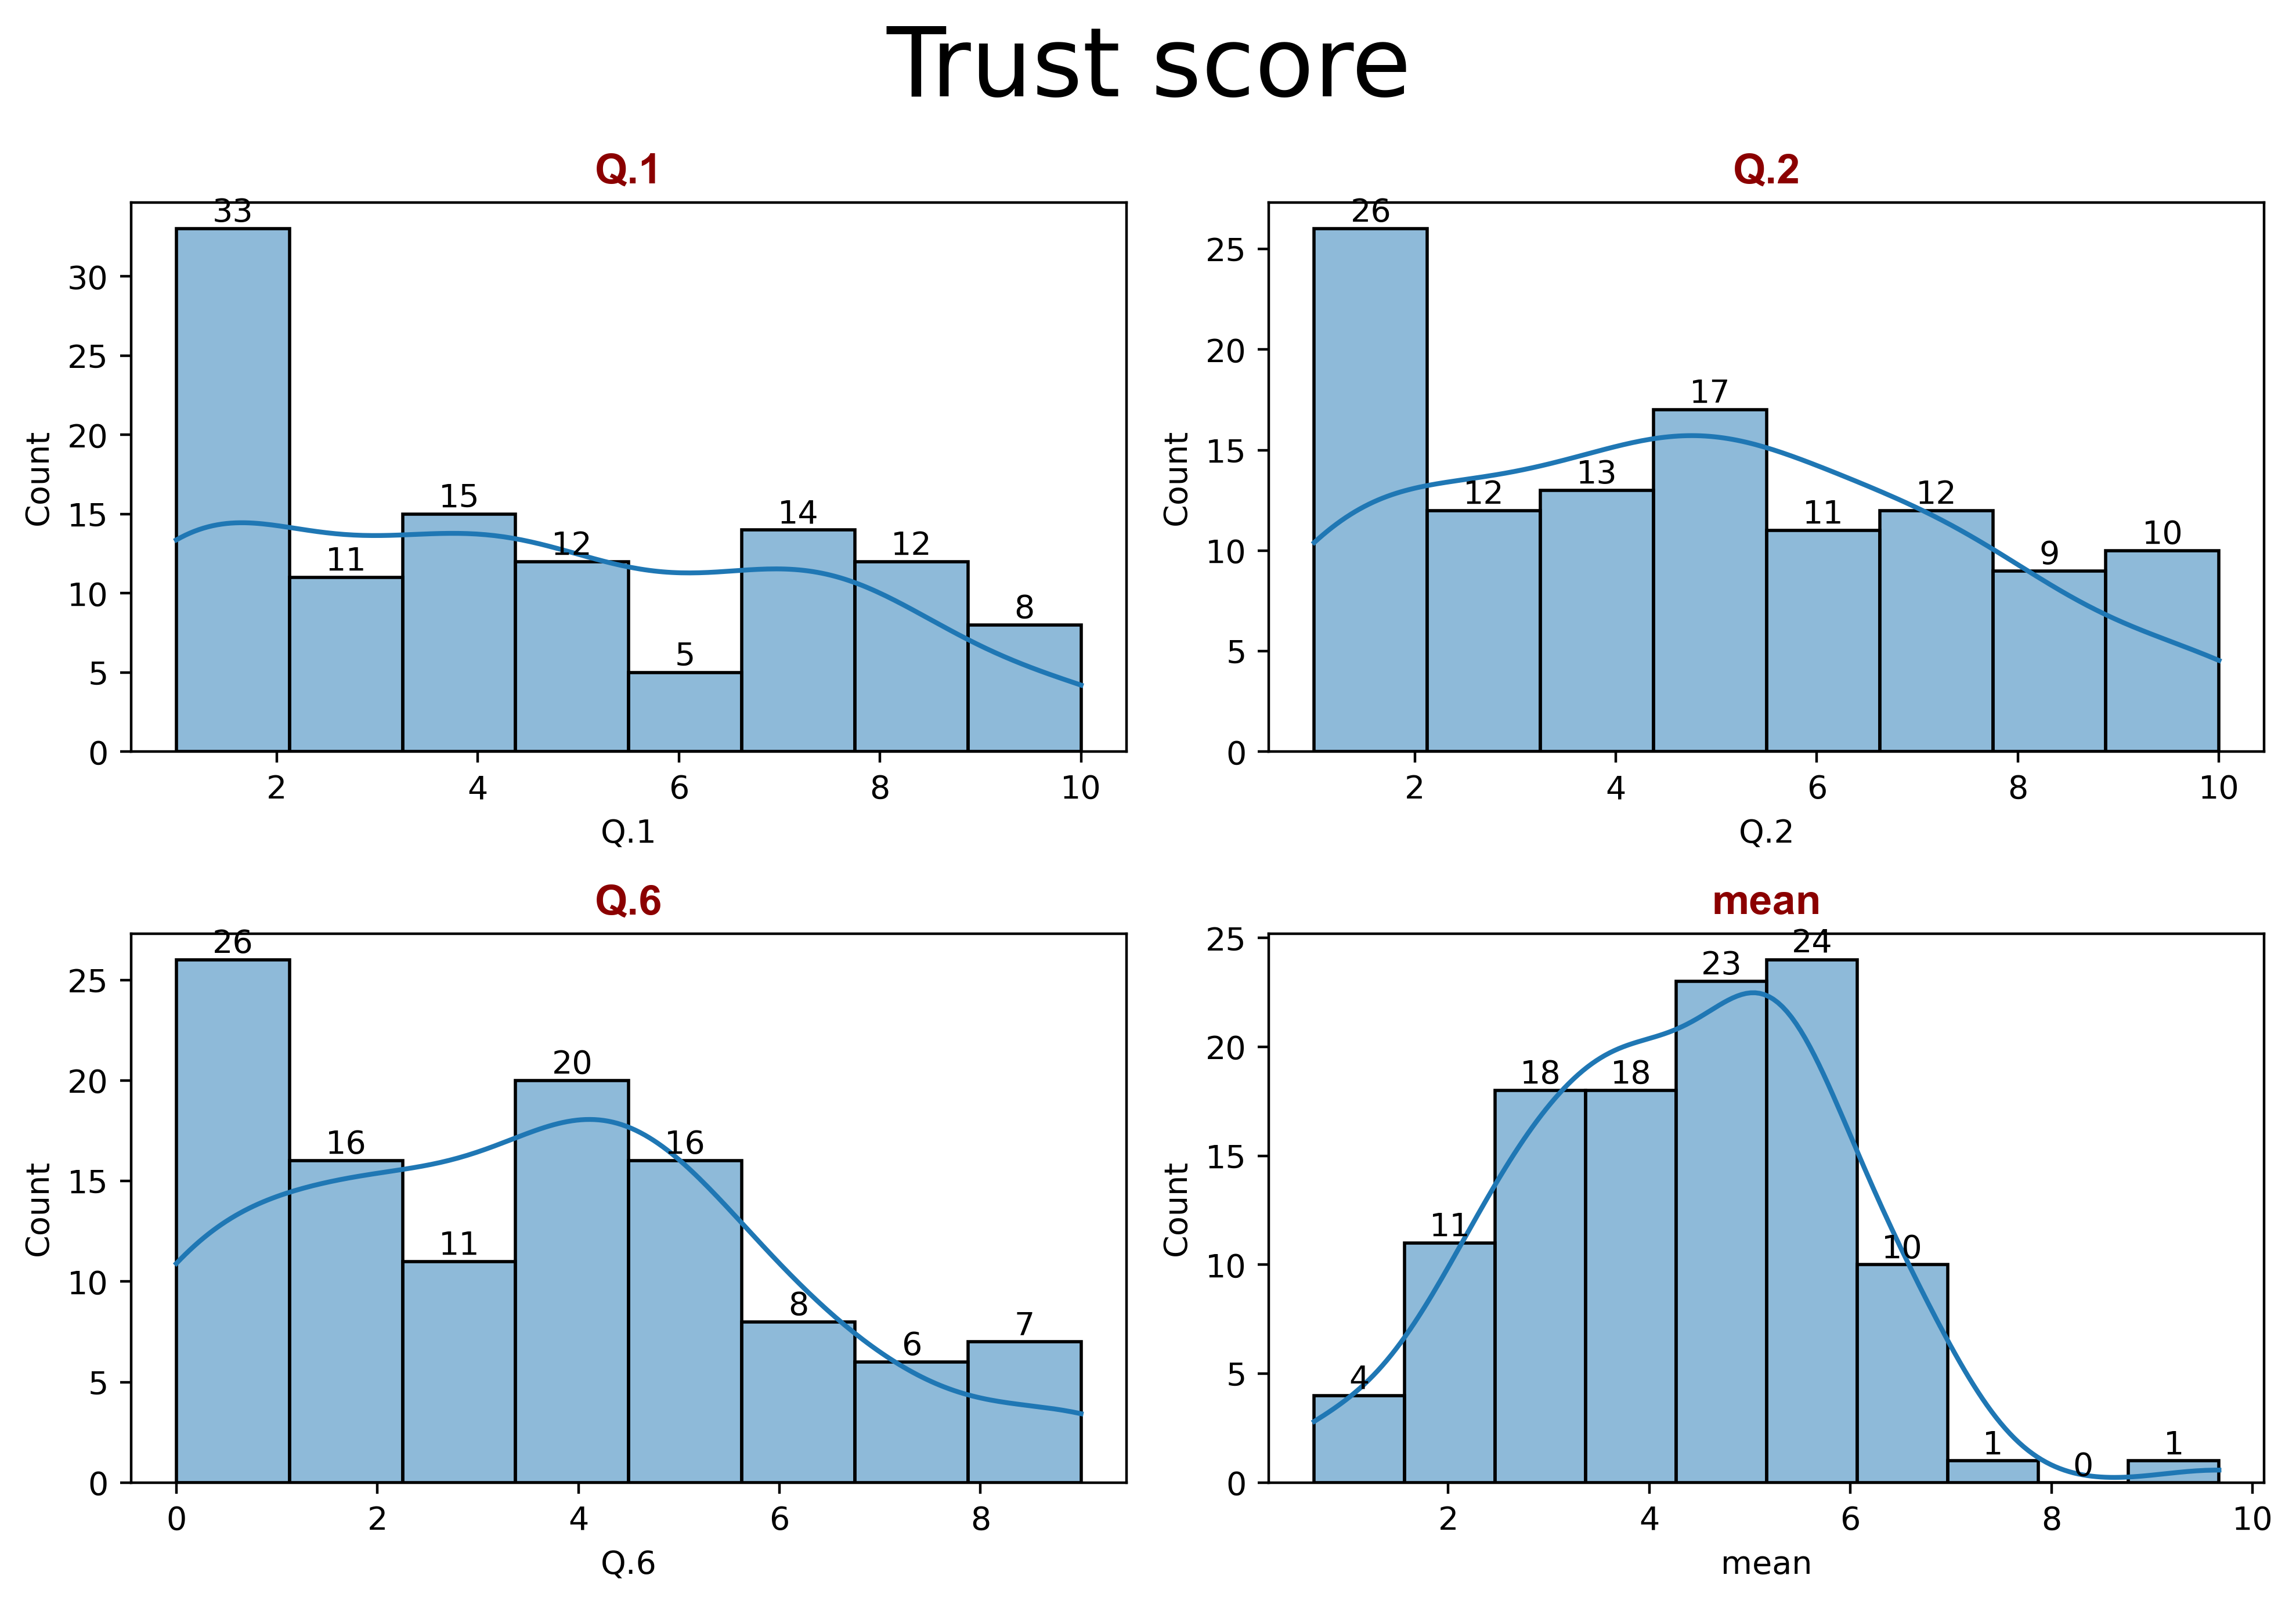

In [26]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(10,7),dpi=400)
for i,col in enumerate(trust.drop(columns=['Q.8'],axis=1).head()):
    plt.subplot(2,2,i+1)
    ax=sns.histplot(trust[col],kde=True)
    plt.title(col,fontdict=baslik_font)
    for container in ax.containers:
        ax.bar_label(container)
plt.suptitle('Trust score', fontsize=30)
plt.tight_layout()
plt.show()

In [27]:
x=final_mc_2.sum()[0].astype(int)
print('Out of ',x)
trust_mc_2=final_mc_2.loc[['Lack of human understanding and empathy','Ethical and privacy concerns','Algorithmic biases']].sum()
trust_mc_2=(trust_mc_2[0]).astype(int)
print(trust_mc_2,"Number of options were chosen related to Trust in AI")
print(final_mc_2.loc[['Lack of human understanding and empathy','Ethical and privacy concerns','Algorithmic biases']])

Out of  241
159 Number of options were chosen related to Trust in AI
                                         Total number particular option is chosen
Lack of human understanding and empathy                                      83.0
Ethical and privacy concerns                                                 42.0
Algorithmic biases                                                           34.0


array([<AxesSubplot:ylabel=' '>], dtype=object)

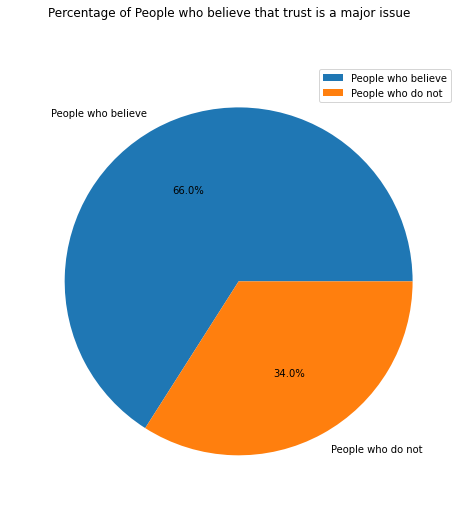

In [28]:
pie_chartx=[trust_mc_2,final_mc_2.sum()[0].astype(int)-trust_mc_2]
pd.DataFrame(pie_chartx,columns=[' ']).plot(figsize=(10,8),kind="pie",subplots=True,labels=['People who believe','People who do not'],autopct='%1.1f%%',title="Percentage of People who believe that trust is a major issue")

array([<AxesSubplot:ylabel='Total number particular option is chosen'>],
      dtype=object)

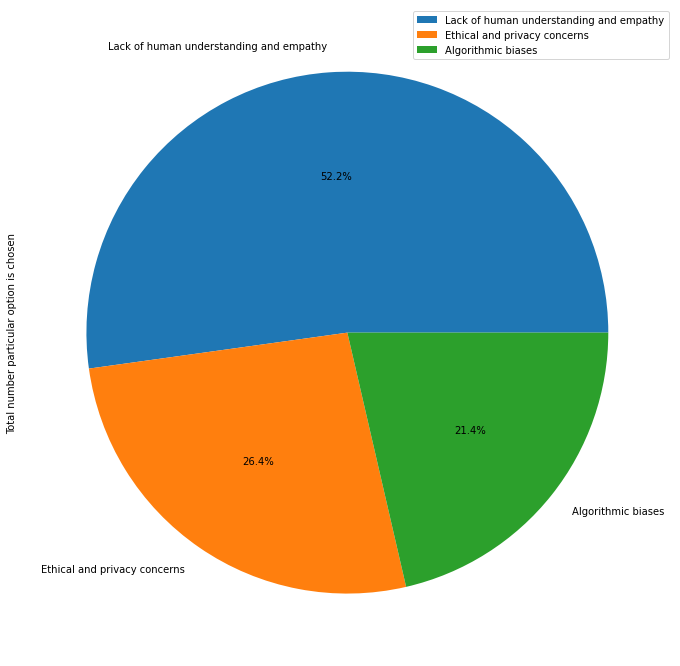

In [29]:
final_mc_2.loc[['Lack of human understanding and empathy','Ethical and privacy concerns','Algorithmic biases']].plot(figsize=(15,12),kind="pie",subplots=True,autopct='%1.1f%%')

In [30]:
trust.drop(columns=['Q.8'],axis=1).describe()

,Q.1,Q.2,Q.6,mean
count,110.000000,110.000000,110.000000,110.000000
mean,4.518182,4.809091,3.527273,4.284848
std,2.817806,2.638791,2.455883,1.593716
min,1.000000,1.000000,0.000000,0.666667
25%,2.000000,3.000000,2.000000,3.000000
50%,4.000000,5.000000,4.000000,4.333333
75%,7.000000,7.000000,5.000000,5.333333
max,10.000000,10.000000,9.000000,9.666667


In [31]:
yes_trust=trust[trust['Q.8']==1].drop(columns=['Q.8'],axis=1)
no_trust=trust[trust['Q.8']==0].drop(columns=['Q.8'],axis=1)

In [32]:
y=yes_trust['mean'].describe()
n=no_trust['mean'].describe()
print(y)

print("Trust score Believers in Stigma Reduction by AI introduction of\n\t\tBelievers\t\t vs\t \t Non-Believers")
print('Mean\t',yes_trust['mean'].mean(),'\t\t\t\t',no_trust['mean'].mean())
print('Median\t',yes_trust['mean'].median(),'\t\t\t\t\t\t',no_trust['mean'].median())
print('Min\t',yes_trust['mean'].max(),'\t\t\t\t',no_trust['mean'].max())
print('Max\t',yes_trust['mean'].min(),'\t\t\t\t',no_trust['mean'].min())

count    70.000000
mean      4.590476
std       1.410989
min       0.666667
25%       3.666667
50%       5.000000
75%       5.666667
max       7.333333
Name: mean, dtype: float64
Trust score Believers in Stigma Reduction by AI introduction of
		Believers		 vs	 	 Non-Believers
Mean	 4.590476190476192 				 3.749999999999999
Median	 5.0 						 3.6666666666666665
Min	 7.333333333333333 				 9.666666666666666
Max	 0.6666666666666666 				 0.6666666666666666


# Attitude

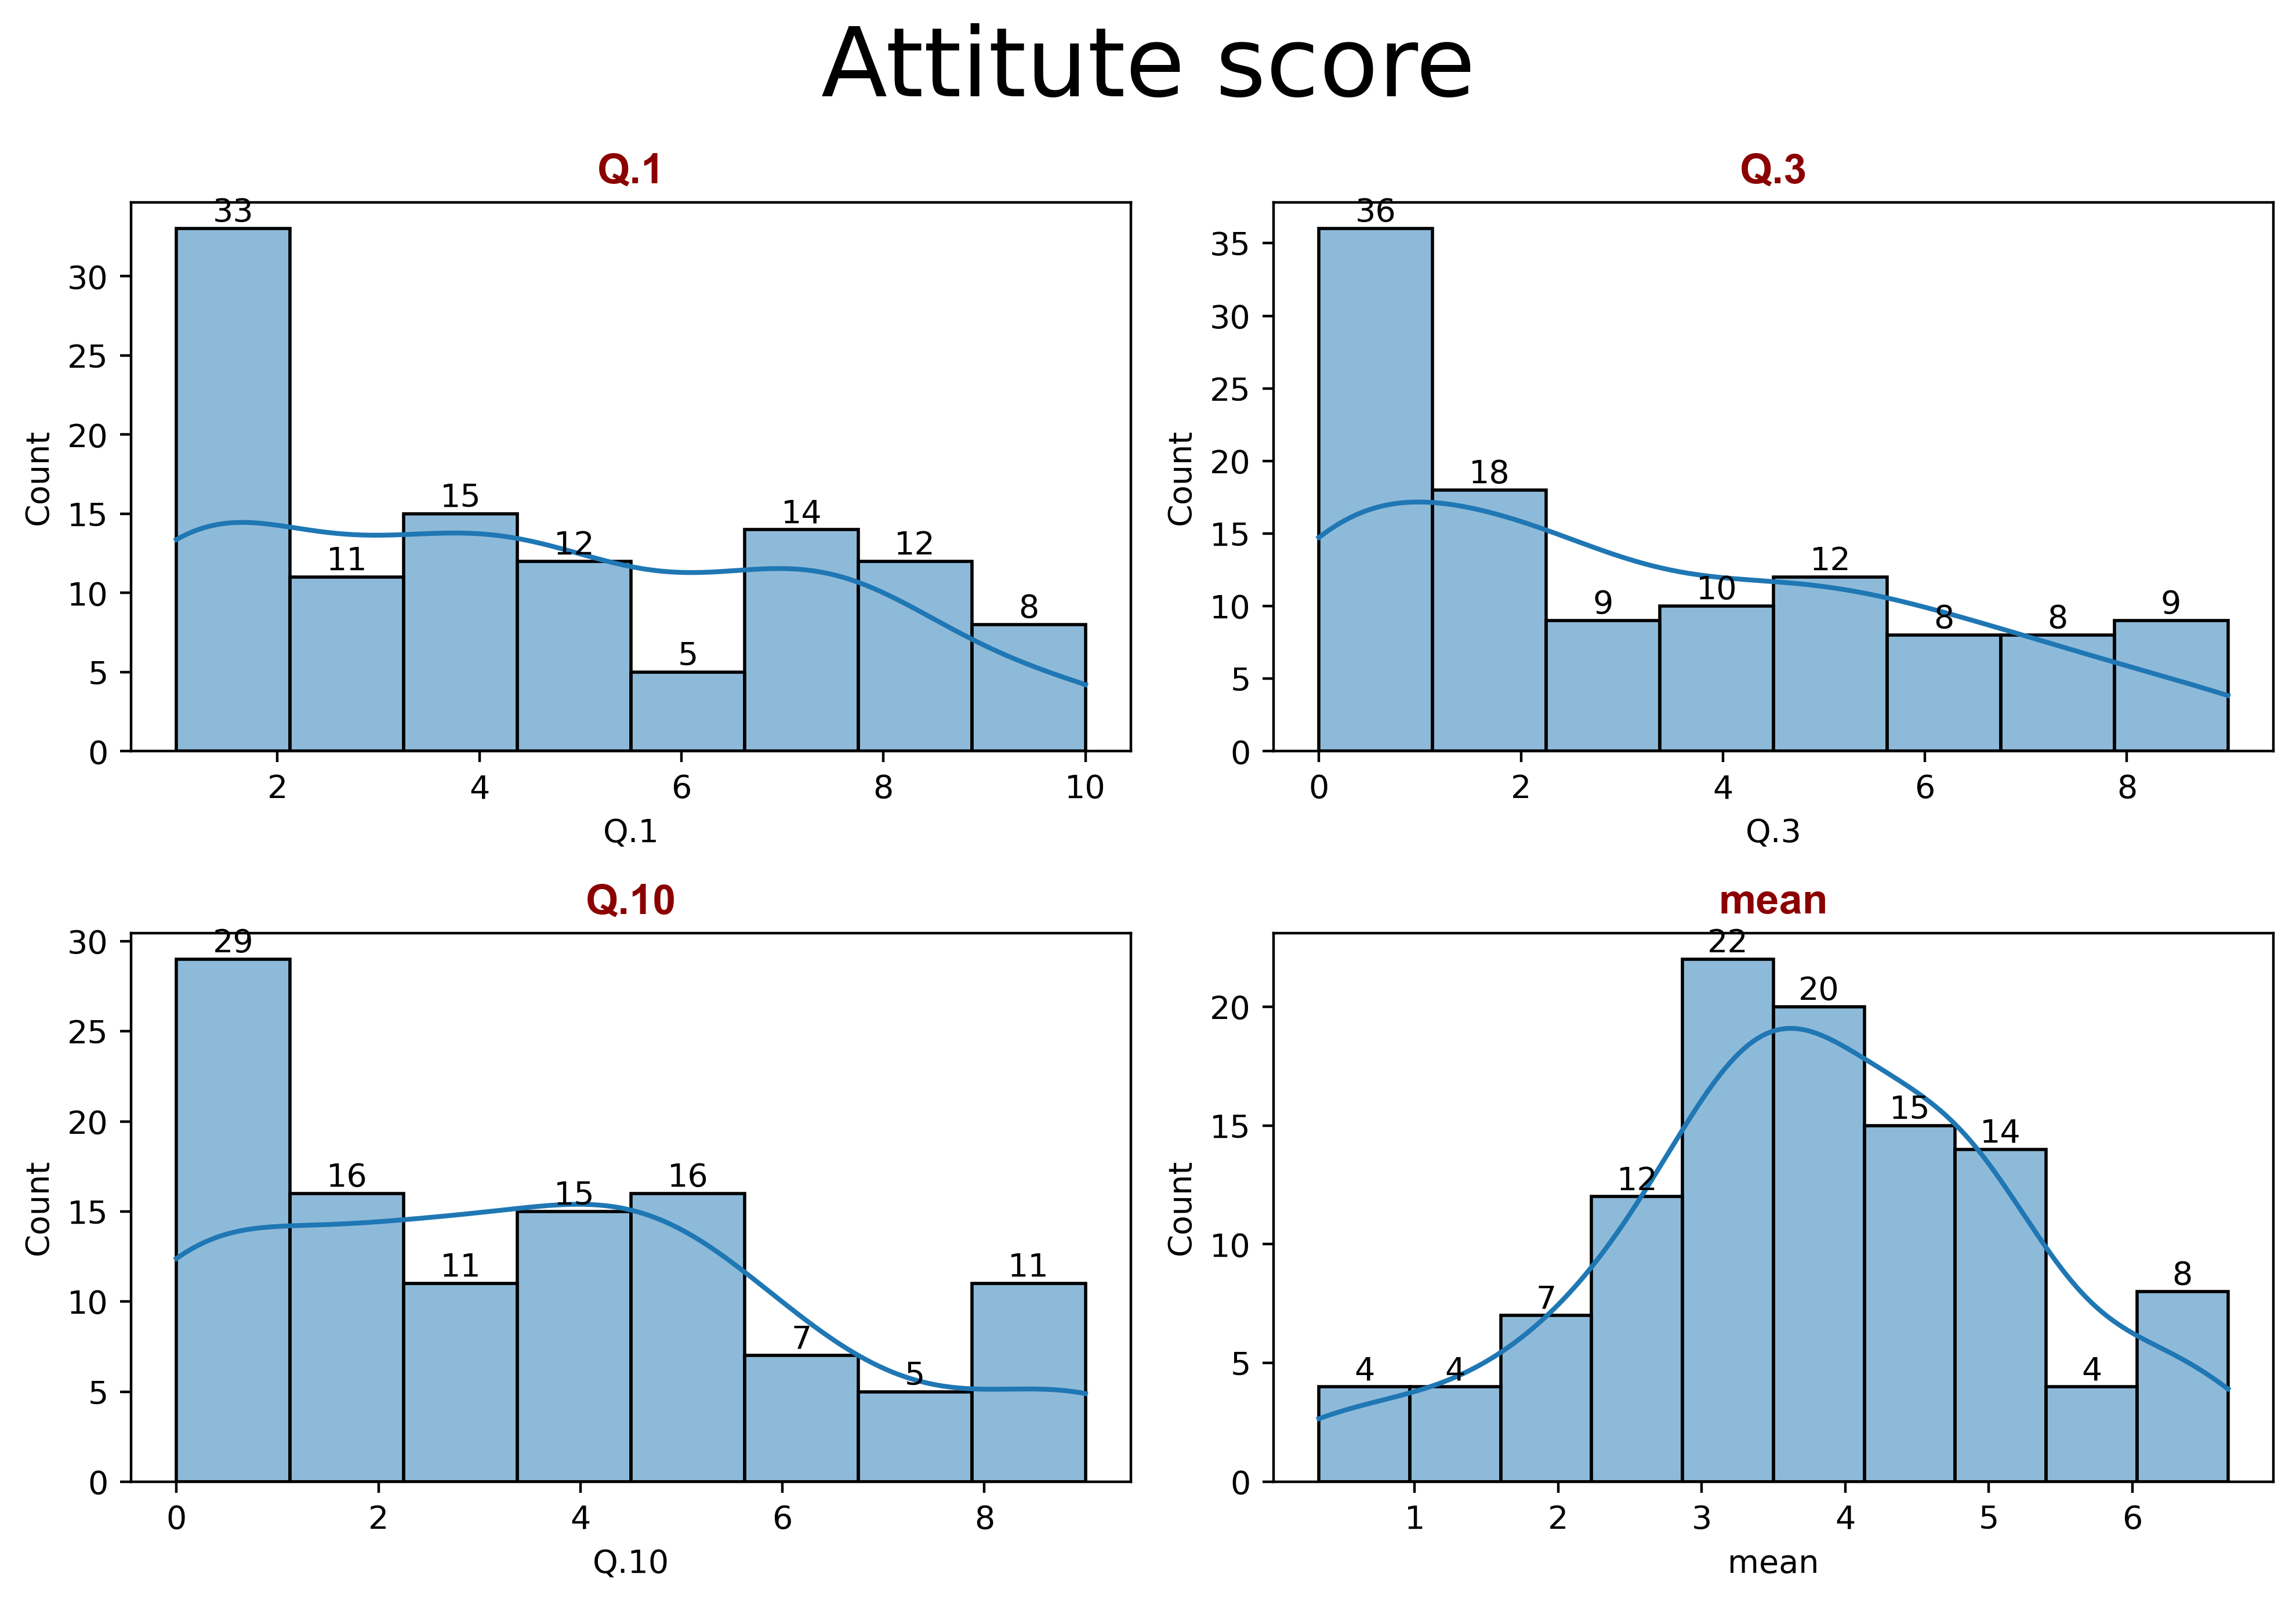

In [33]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(10,7),dpi=400)
for i,col in enumerate(att.head()):
    plt.subplot(2,2,i+1)
    ax=sns.histplot(att[col],kde=True)
    plt.title(col,fontdict=baslik_font)
    for container in ax.containers:
        ax.bar_label(container)
plt.suptitle('Attitute score', fontsize=30)
plt.tight_layout()
plt.show()

In [34]:
print('Out of ',final_mc_1.sum()[0].astype(int))
att_mc_1=final_mc_1.loc[['No significant benefits','Faster and more efficient healthcare delivery','Streamlined administrative tasks','For finding the source of information and the physicians using it assimilate their understanding','More profit for the system','Enhanced treatment planning']].sum()
att_mc_1=(att_mc_1[0]).astype(int)
print(att_mc_1,"Number of times Attitute related option was chosen")
print(final_mc_1.loc[['No significant benefits','Faster and more efficient healthcare delivery','Streamlined administrative tasks','For finding the source of information and the physicians using it assimilate their understanding','More profit for the system','Enhanced treatment planning']])

Out of  204
162 Number of times Attitute related option was chosen
                                                    Total number particular option is chosen
No significant benefits                                                                 22.0
Faster and more efficient healthcare delivery                                           55.0
Streamlined administrative tasks                                                        40.0
For finding the source of information and the p...                                       1.0
More profit for the system                                                               1.0
Enhanced treatment planning                                                             43.0


array([<AxesSubplot:ylabel=' '>], dtype=object)

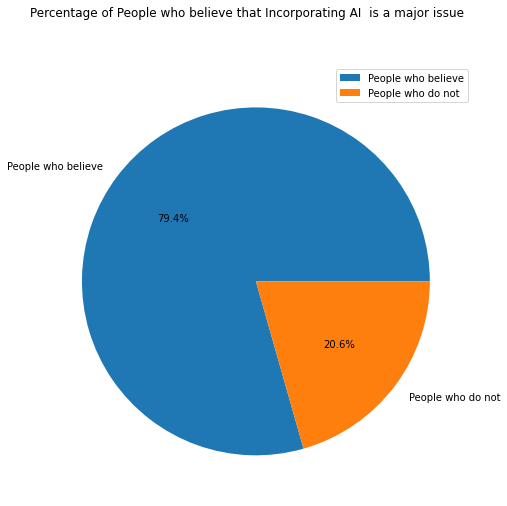

In [51]:
pie_chartx=[att_mc_1,final_mc_1.sum()[0].astype(int)-att_mc_1]
pd.DataFrame(pie_chartx,columns=[' ']).plot(figsize=(10,8),kind="pie",subplots=True,labels=['People who believe','People who do not'],autopct='%1.1f%%',title="Percentage of People who believe that Incorporating AI  is a major issue")

array([<AxesSubplot:ylabel='Total number particular option is chosen'>],
      dtype=object)

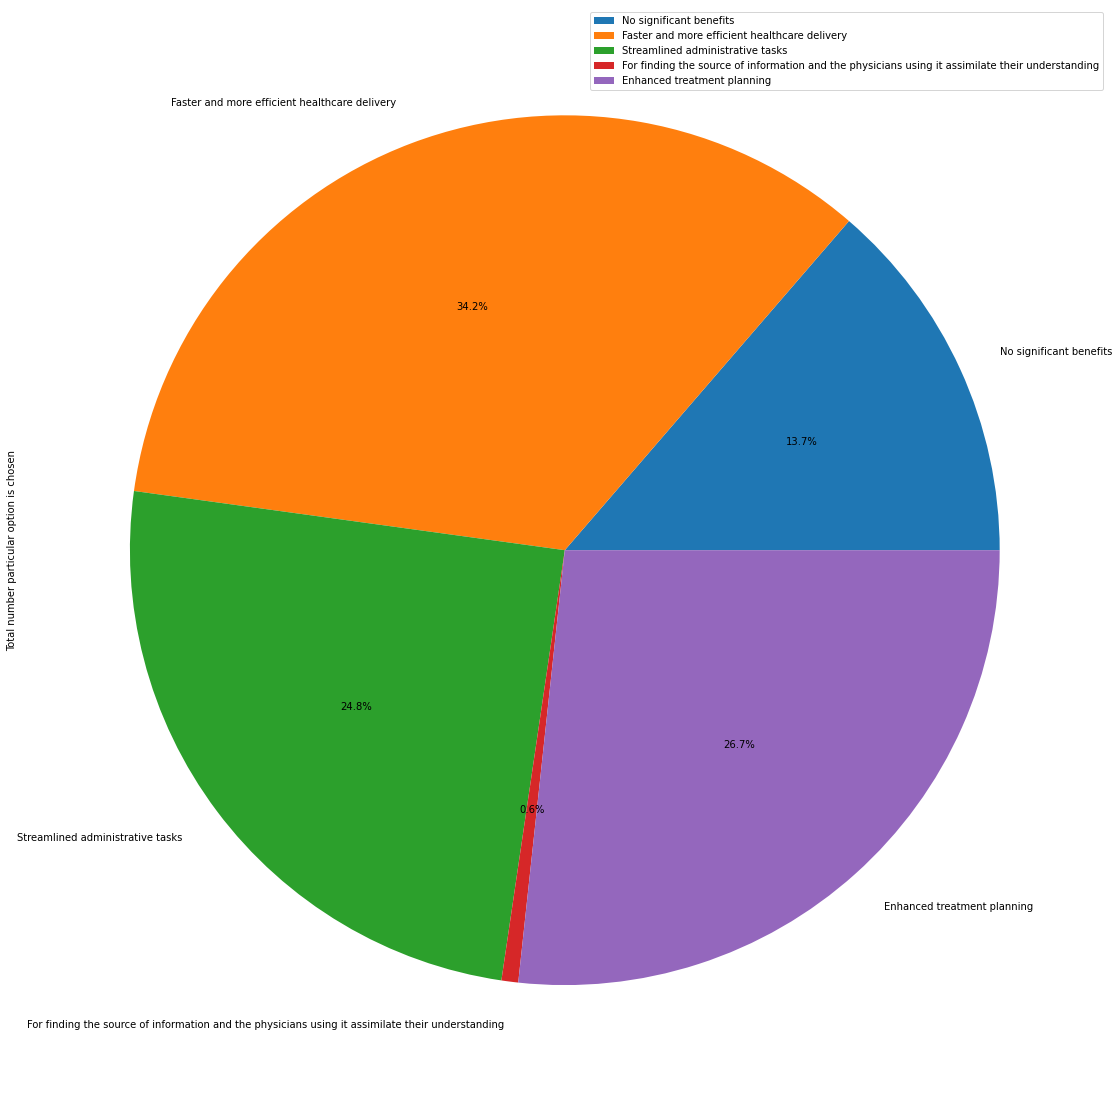

In [73]:
final_mc_1.loc[['No significant benefits','Faster and more efficient healthcare delivery','Streamlined administrative tasks','For finding the source of information and the physicians using it assimilate their understanding','Enhanced treatment planning']].plot(figsize=(70,20),kind="pie",subplots=True,autopct='%1.1f%%')

## Public Awareness

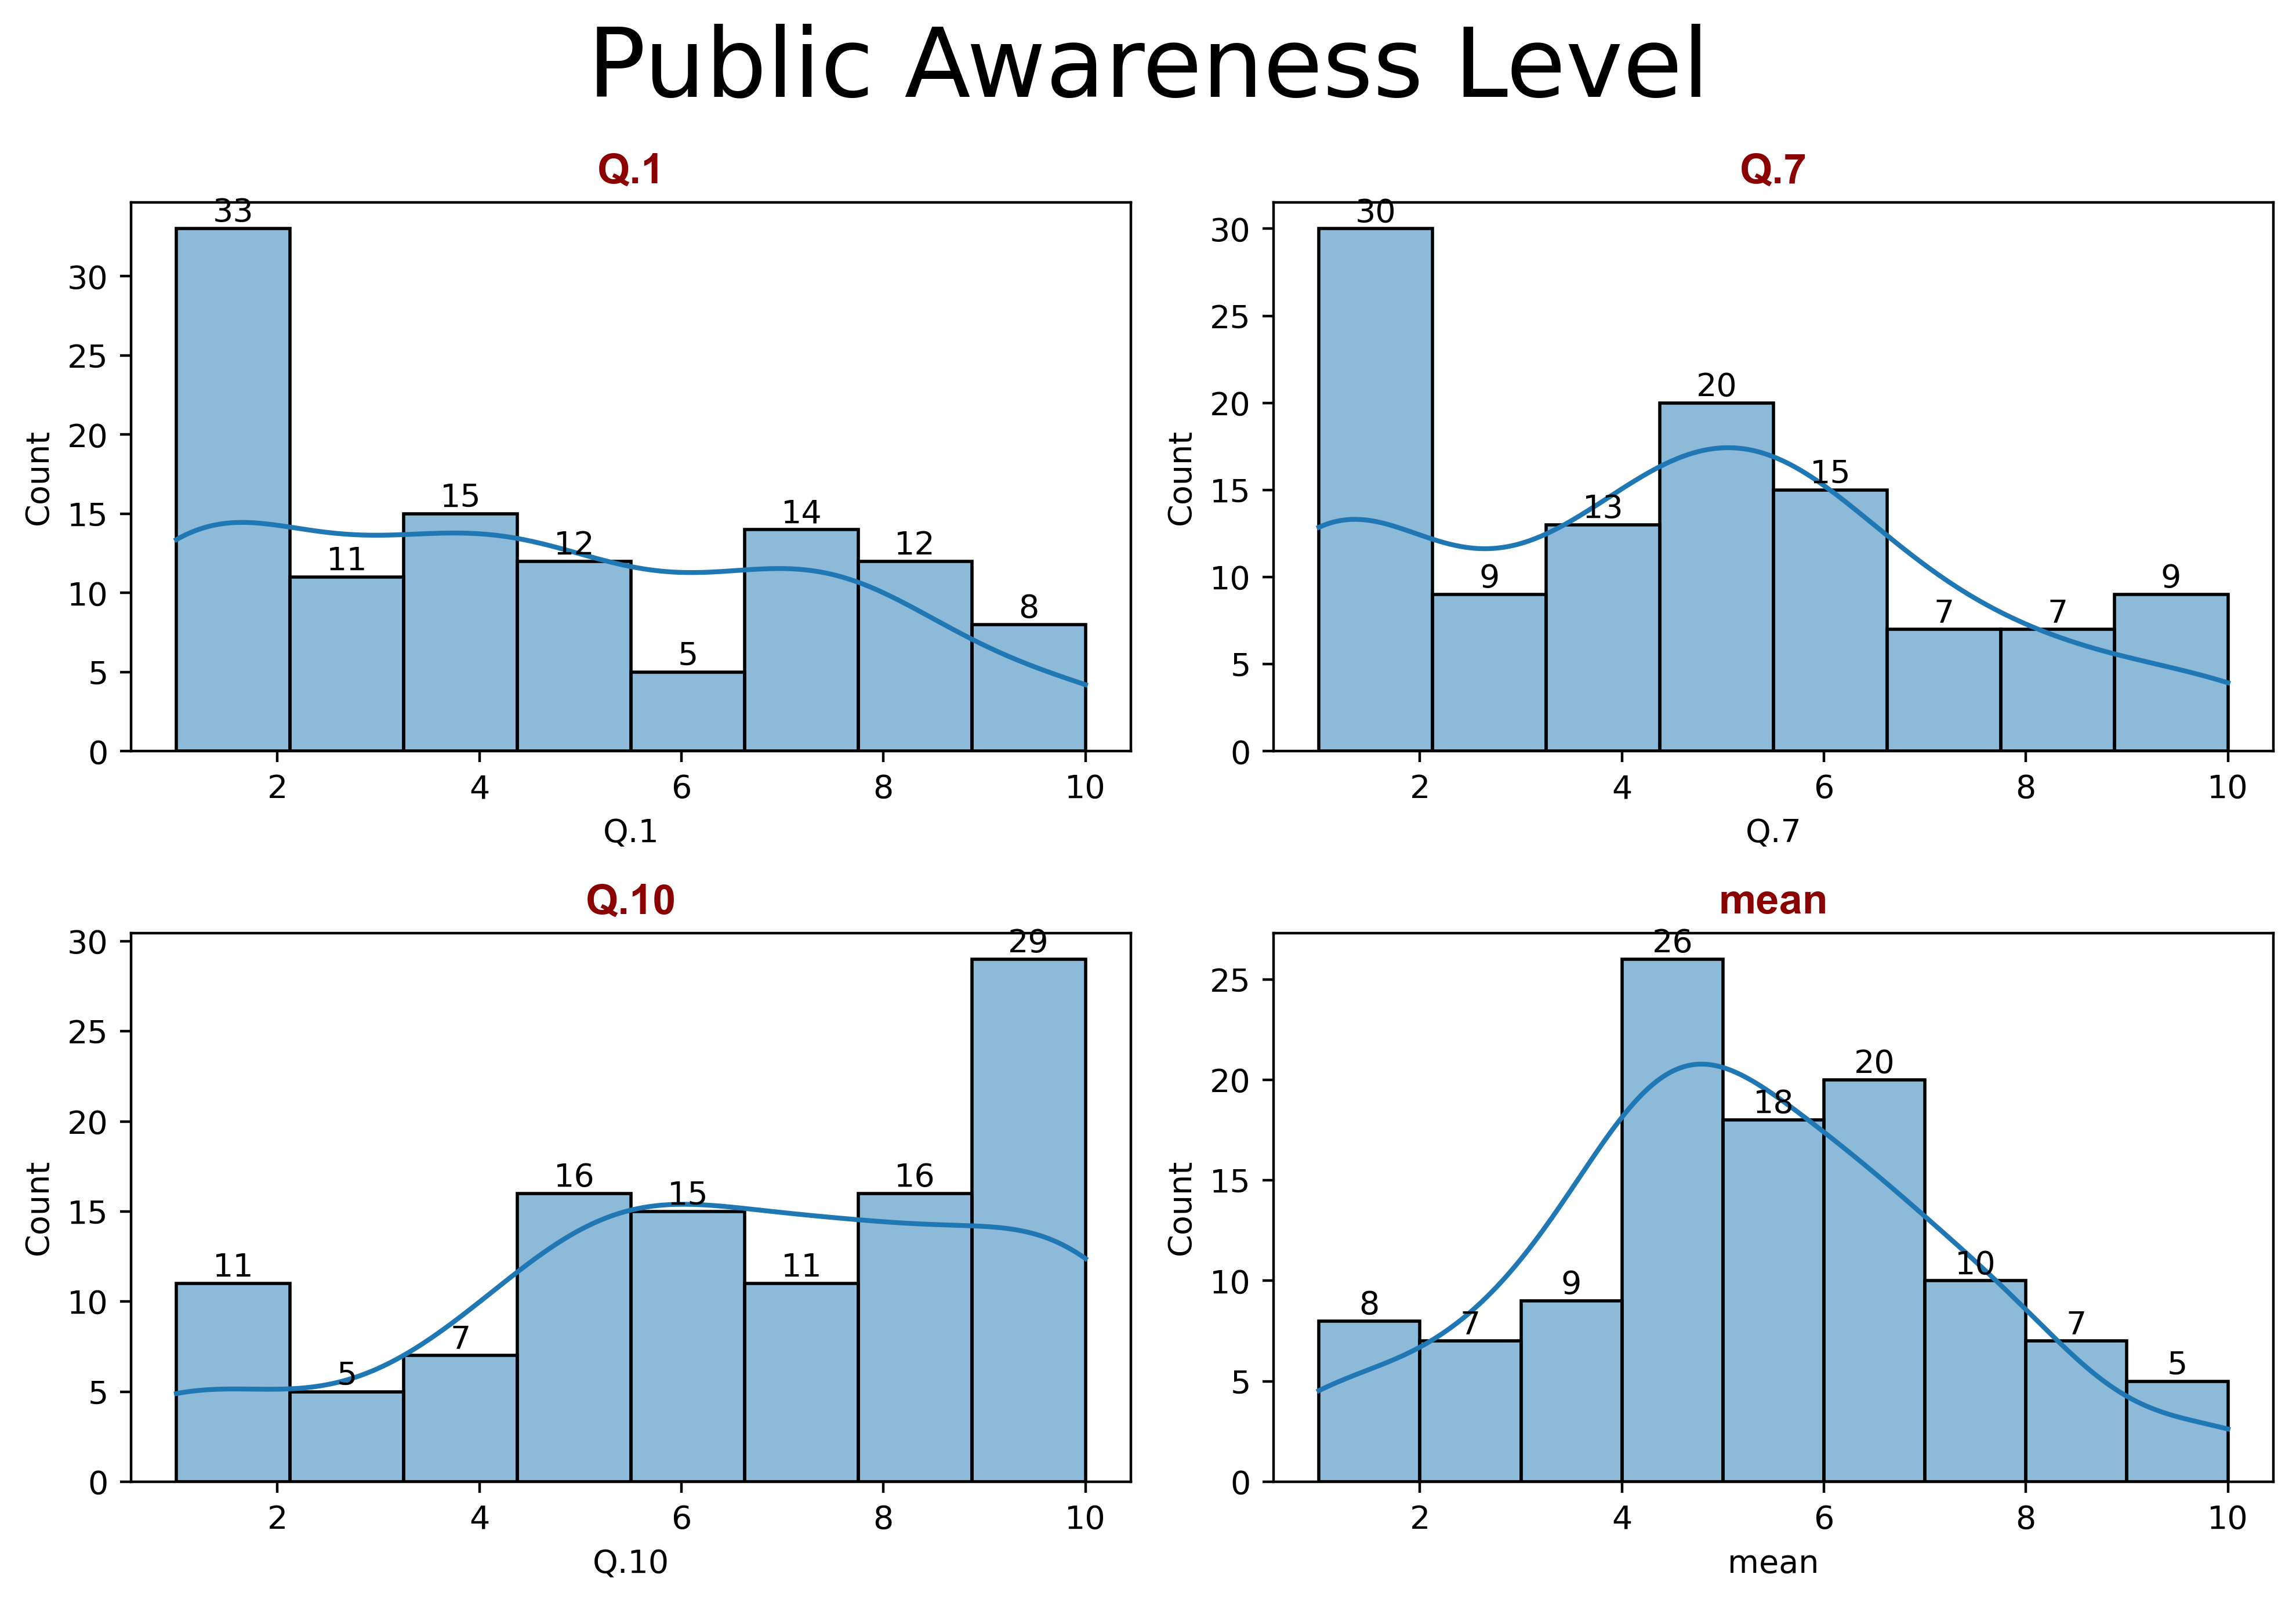

In [35]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(10,7),dpi=400)
for i,col in enumerate(aware.drop(columns=['Q.8','Q.9'],axis=1).head()):
    plt.subplot(2,2,i+1)
    ax=sns.histplot(aware[col],kde=True)
    plt.title(col,fontdict=baslik_font)
    for container in ax.containers:
        ax.bar_label(container)
plt.suptitle('Public Awareness Level', fontsize=30)
plt.tight_layout()
plt.show()

In [36]:
aware.drop(columns=['Q.8','Q.9'],axis=1).describe()

,Q.1,Q.7,Q.10,mean
count,110.000000,110.000000,110.000000,110.000000
mean,4.518182,4.509091,6.481818,5.169697
std,2.817806,2.660432,2.741900,2.112410
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,5.000000,4.000000
50%,4.000000,5.000000,7.000000,5.000000
75%,7.000000,6.000000,9.000000,6.583333
max,10.000000,10.000000,10.000000,10.000000


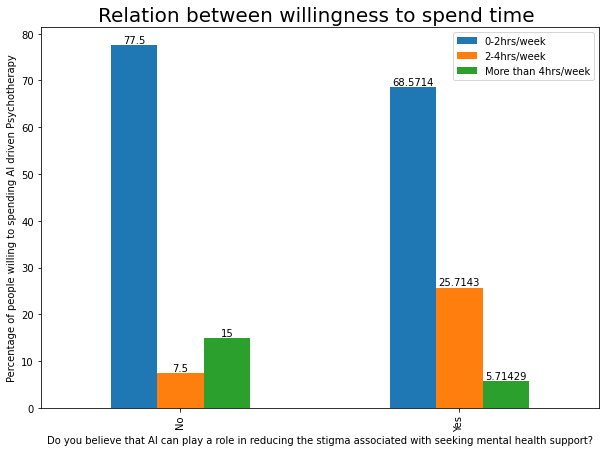

In [37]:
compare=pd.crosstab(aware['Q.8'],aware['Q.9'],rownames=['Q.8'], colnames=['Q.9']) 
compare.columns=['0-2hrs/week','2-4hrs/week','More than 4hrs/week']
compare.index=['No','Yes']
compare.loc["No"]=compare.loc["No"]/compare.loc["No"].sum()*100
compare.loc["Yes"]=compare.loc["Yes"]/compare.loc["Yes"].sum()*100
ax=compare.plot.bar(figsize=(10,7))
plt.xlabel("Do you believe that AI can play a role in reducing the stigma associated with seeking mental health support?")
plt.ylabel("Percentage of people willing to spending AI driven Psychotherapy")
plt.title("Relation between willingness to spend time ", fontsize=20)
for container in ax.containers:
    ax.bar_label(container)

In [38]:
print('Out of ',final_mc_2.sum()[0].astype(int))
aware_mc_2=final_mc_2.loc[['Algorithmic biases','Limited personalization','Lack of immediate crisis intervention capability']].sum()
aware_mc_2=(aware_mc_2[0]).astype(int)
print(aware_mc_2,"Number of times Awareness related option was chosen")
print(final_mc_2.loc[['Algorithmic biases','Limited personalization','Lack of immediate crisis intervention capability']])

Out of  241
113 Number of times Awareness related option was chosen
                                                  Total number particular option is chosen
Algorithmic biases                                                                    34.0
Limited personalization                                                               40.0
Lack of immediate crisis intervention capability                                      39.0


array([<AxesSubplot:ylabel=' '>], dtype=object)

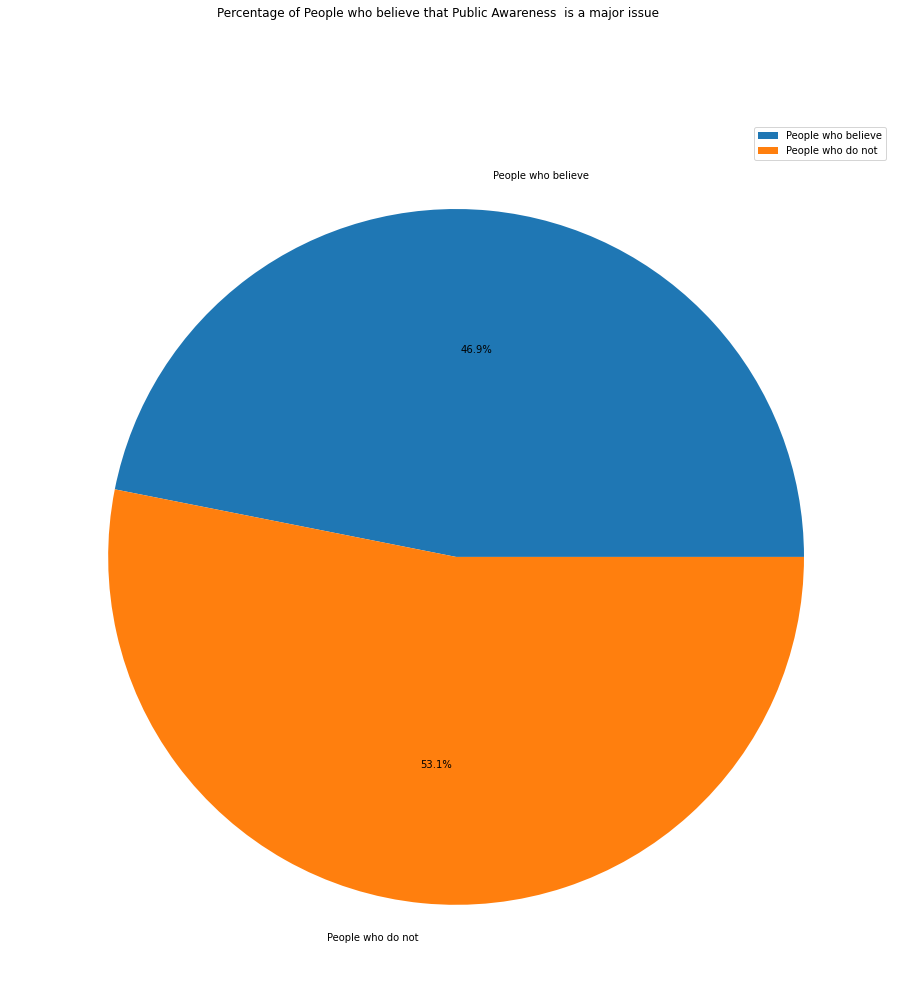

In [55]:
pie_chartx=[aware_mc_2,final_mc_2.sum()[0].astype(int)-aware_mc_2]
pd.DataFrame(pie_chartx,columns=[' ']).plot(figsize=(20,16),kind="pie",subplots=True,labels=['People who believe','People who do not'],autopct='%1.1f%%',title="Percentage of People who believe that Public Awareness  is a major issue")

array([<AxesSubplot:ylabel='Total number particular option is chosen'>],
      dtype=object)

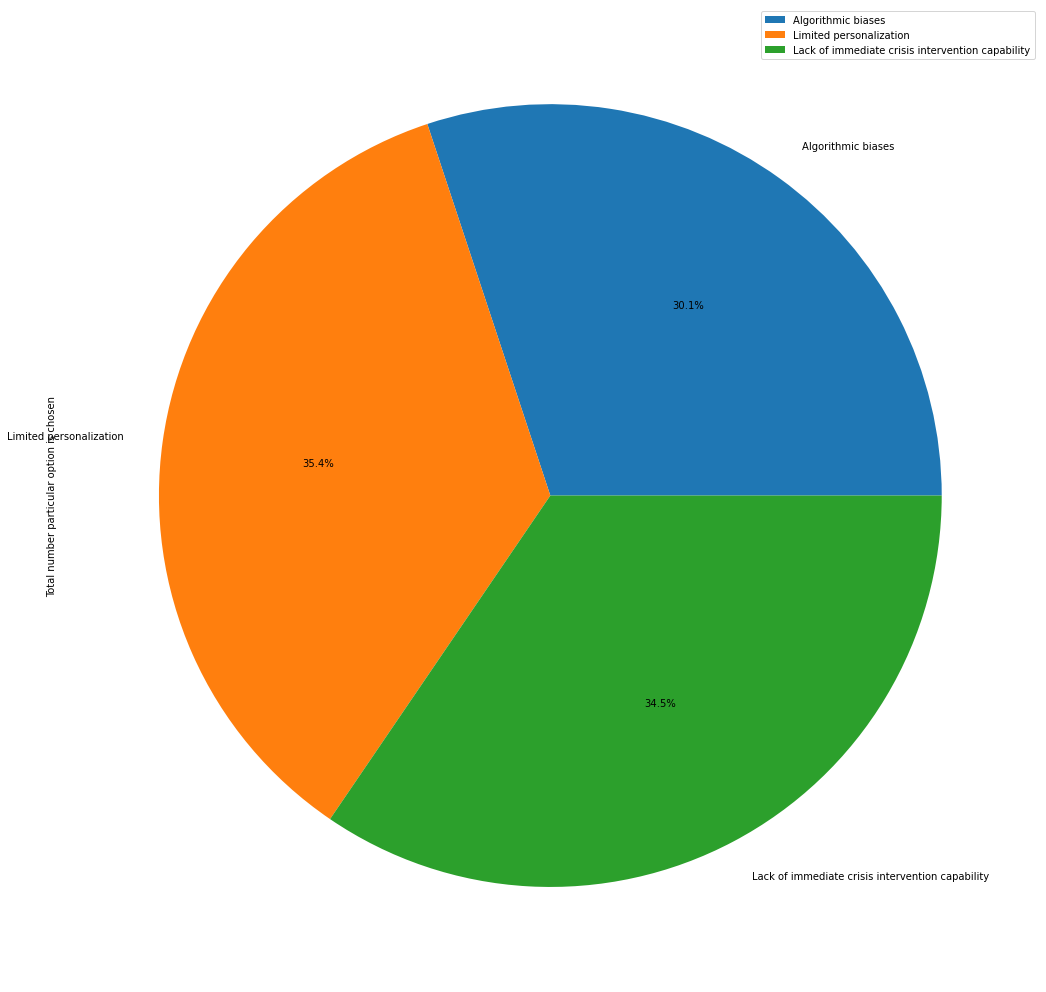

In [57]:
final_mc_2.loc[['Algorithmic biases','Limited personalization','Lack of immediate crisis intervention capability']].plot(figsize=(20,18),kind="pie",subplots=True,autopct='%1.1f%%')

## Impact on Human-to-Human Therapeutic Relationship

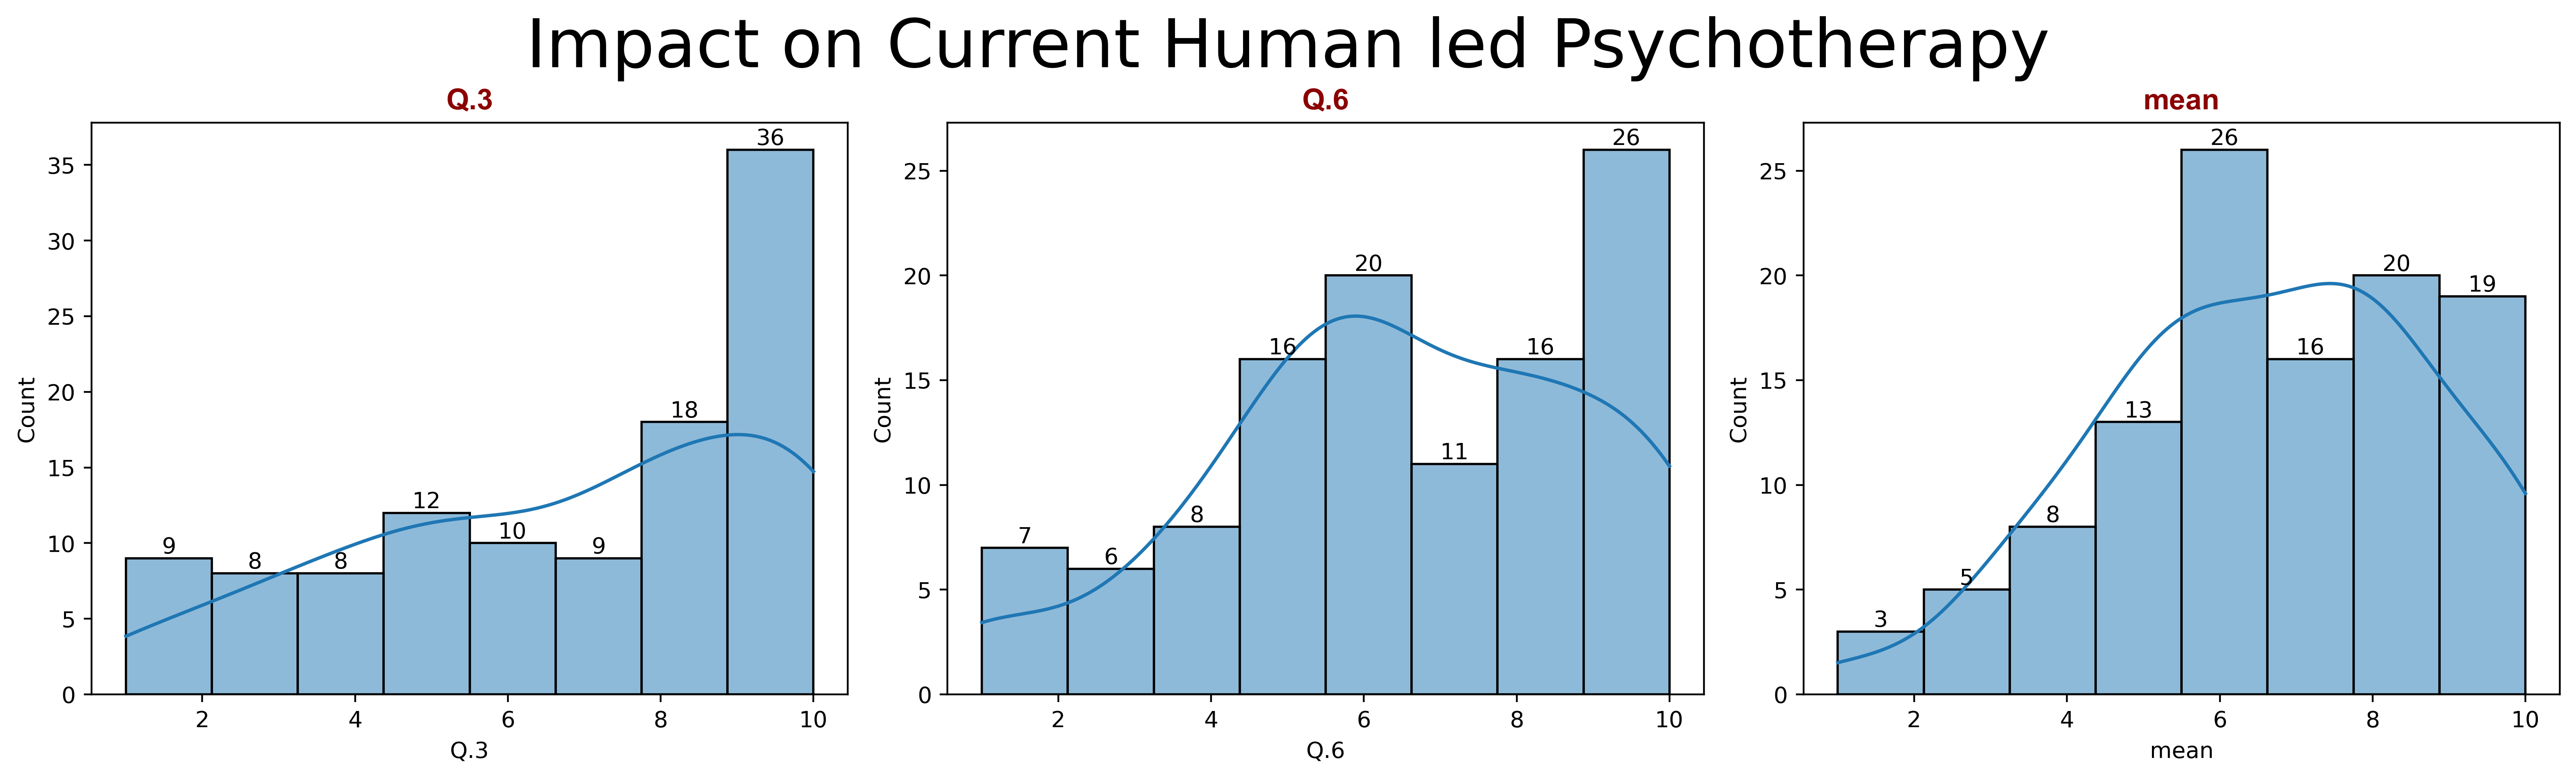

In [39]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(16,12.8),dpi=400)
for i,col in enumerate(impact.drop(columns=['Q.9'],axis=1).head()):
    plt.subplot(3,3,i+1)
    ax=sns.histplot(impact[col],kde=True)
    plt.title(col,fontdict=baslik_font)
    for container in ax.containers:
        ax.bar_label(container)
plt.suptitle('Impact on Current Human led Psychotherapy', fontsize=30)
plt.tight_layout()
plt.show()

In [40]:
print('Out of ',final_mc_2.sum()[0].astype(int))
impact_mc_2=final_mc_2.loc[['Lack of human understanding and empathy','Limited personalization','Lack of immediate crisis intervention capability']].sum()
impact_mc_2=(impact_mc_2[0]).astype(int)
print(impact_mc_2,"Number of times Impact on Human led Psychotherapy related option was chosen")
print(final_mc_2.loc[['Lack of human understanding and empathy','Limited personalization','Lack of immediate crisis intervention capability']])

Out of  241
162 Number of times Impact on Human led Psychotherapy related option was chosen
                                                  Total number particular option is chosen
Lack of human understanding and empathy                                               83.0
Limited personalization                                                               40.0
Lack of immediate crisis intervention capability                                      39.0


array([<AxesSubplot:ylabel=' '>], dtype=object)

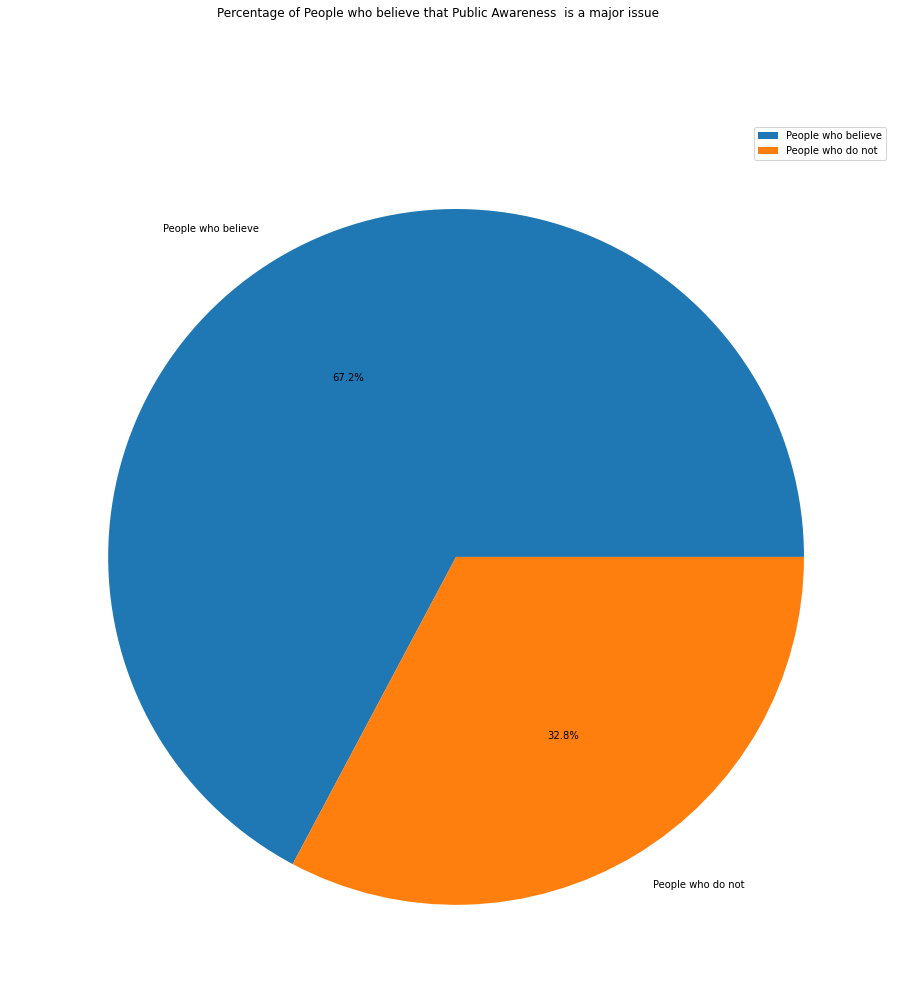

In [61]:
pie_chartx=[impact_mc_2,final_mc_2.sum()[0].astype(int)-impact_mc_2]
pd.DataFrame(pie_chartx,columns=[' ']).plot(figsize=(20,16),kind="pie",subplots=True,labels=['People who believe','People who do not'],autopct='%1.1f%%',title="Percentage of People who believe that Public Awareness  is a major issue")

array([<AxesSubplot:ylabel='Total number particular option is chosen'>],
      dtype=object)

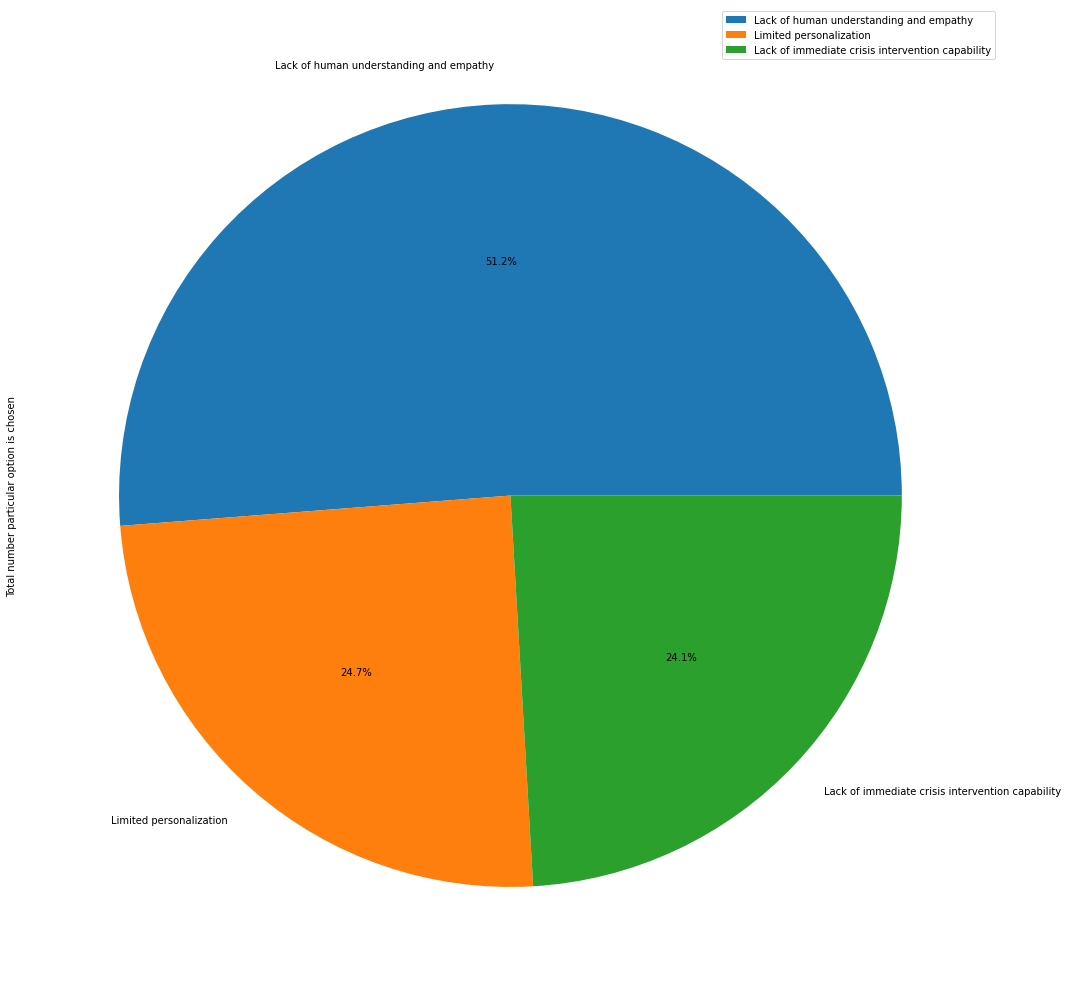

In [59]:
final_mc_2.loc[['Lack of human understanding and empathy','Limited personalization','Lack of immediate crisis intervention capability']].plot(figsize=(20,18),kind="pie",subplots=True,autopct='%1.1f%%')

      0-2hrs/week  2-4hrs/week  More than 4hrs/week
Mean                                               
1.0             1            0                    1
2.0             1            0                    0
3.0             3            0                    2
3.5             3            0                    0
4.0             2            3                    0
4.5             5            0                    0
5.0             7            1                    0
5.5             6            4                    1
6.0             4            2                    1
6.5             7            1                    0
7.0             7            2                    0
7.5             6            0                    1
8.0             9            4                    1
8.5             2            2                    2
9.0             5            0                    0
9.5             4            0                    0
10.0            7            2                    1


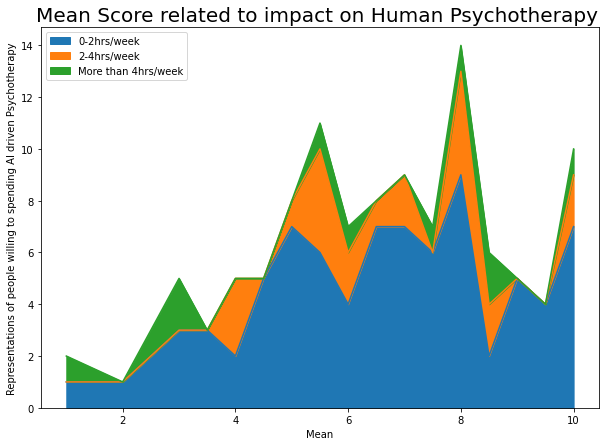

In [41]:
compare=pd.crosstab(impact['mean'],impact['Q.9'],rownames=['Mean'], colnames=['Q.9']) 
compare.columns=['0-2hrs/week','2-4hrs/week','More than 4hrs/week']
ax=compare.plot(kind="area",figsize=(10,7))
plt.xlabel("Mean")
plt.ylabel("Representations of people willing to spending AI driven Psychotherapy")
plt.title("Mean Score related to impact on Human Psychotherapy ", fontsize=20)
print(compare)

# Economical Implications

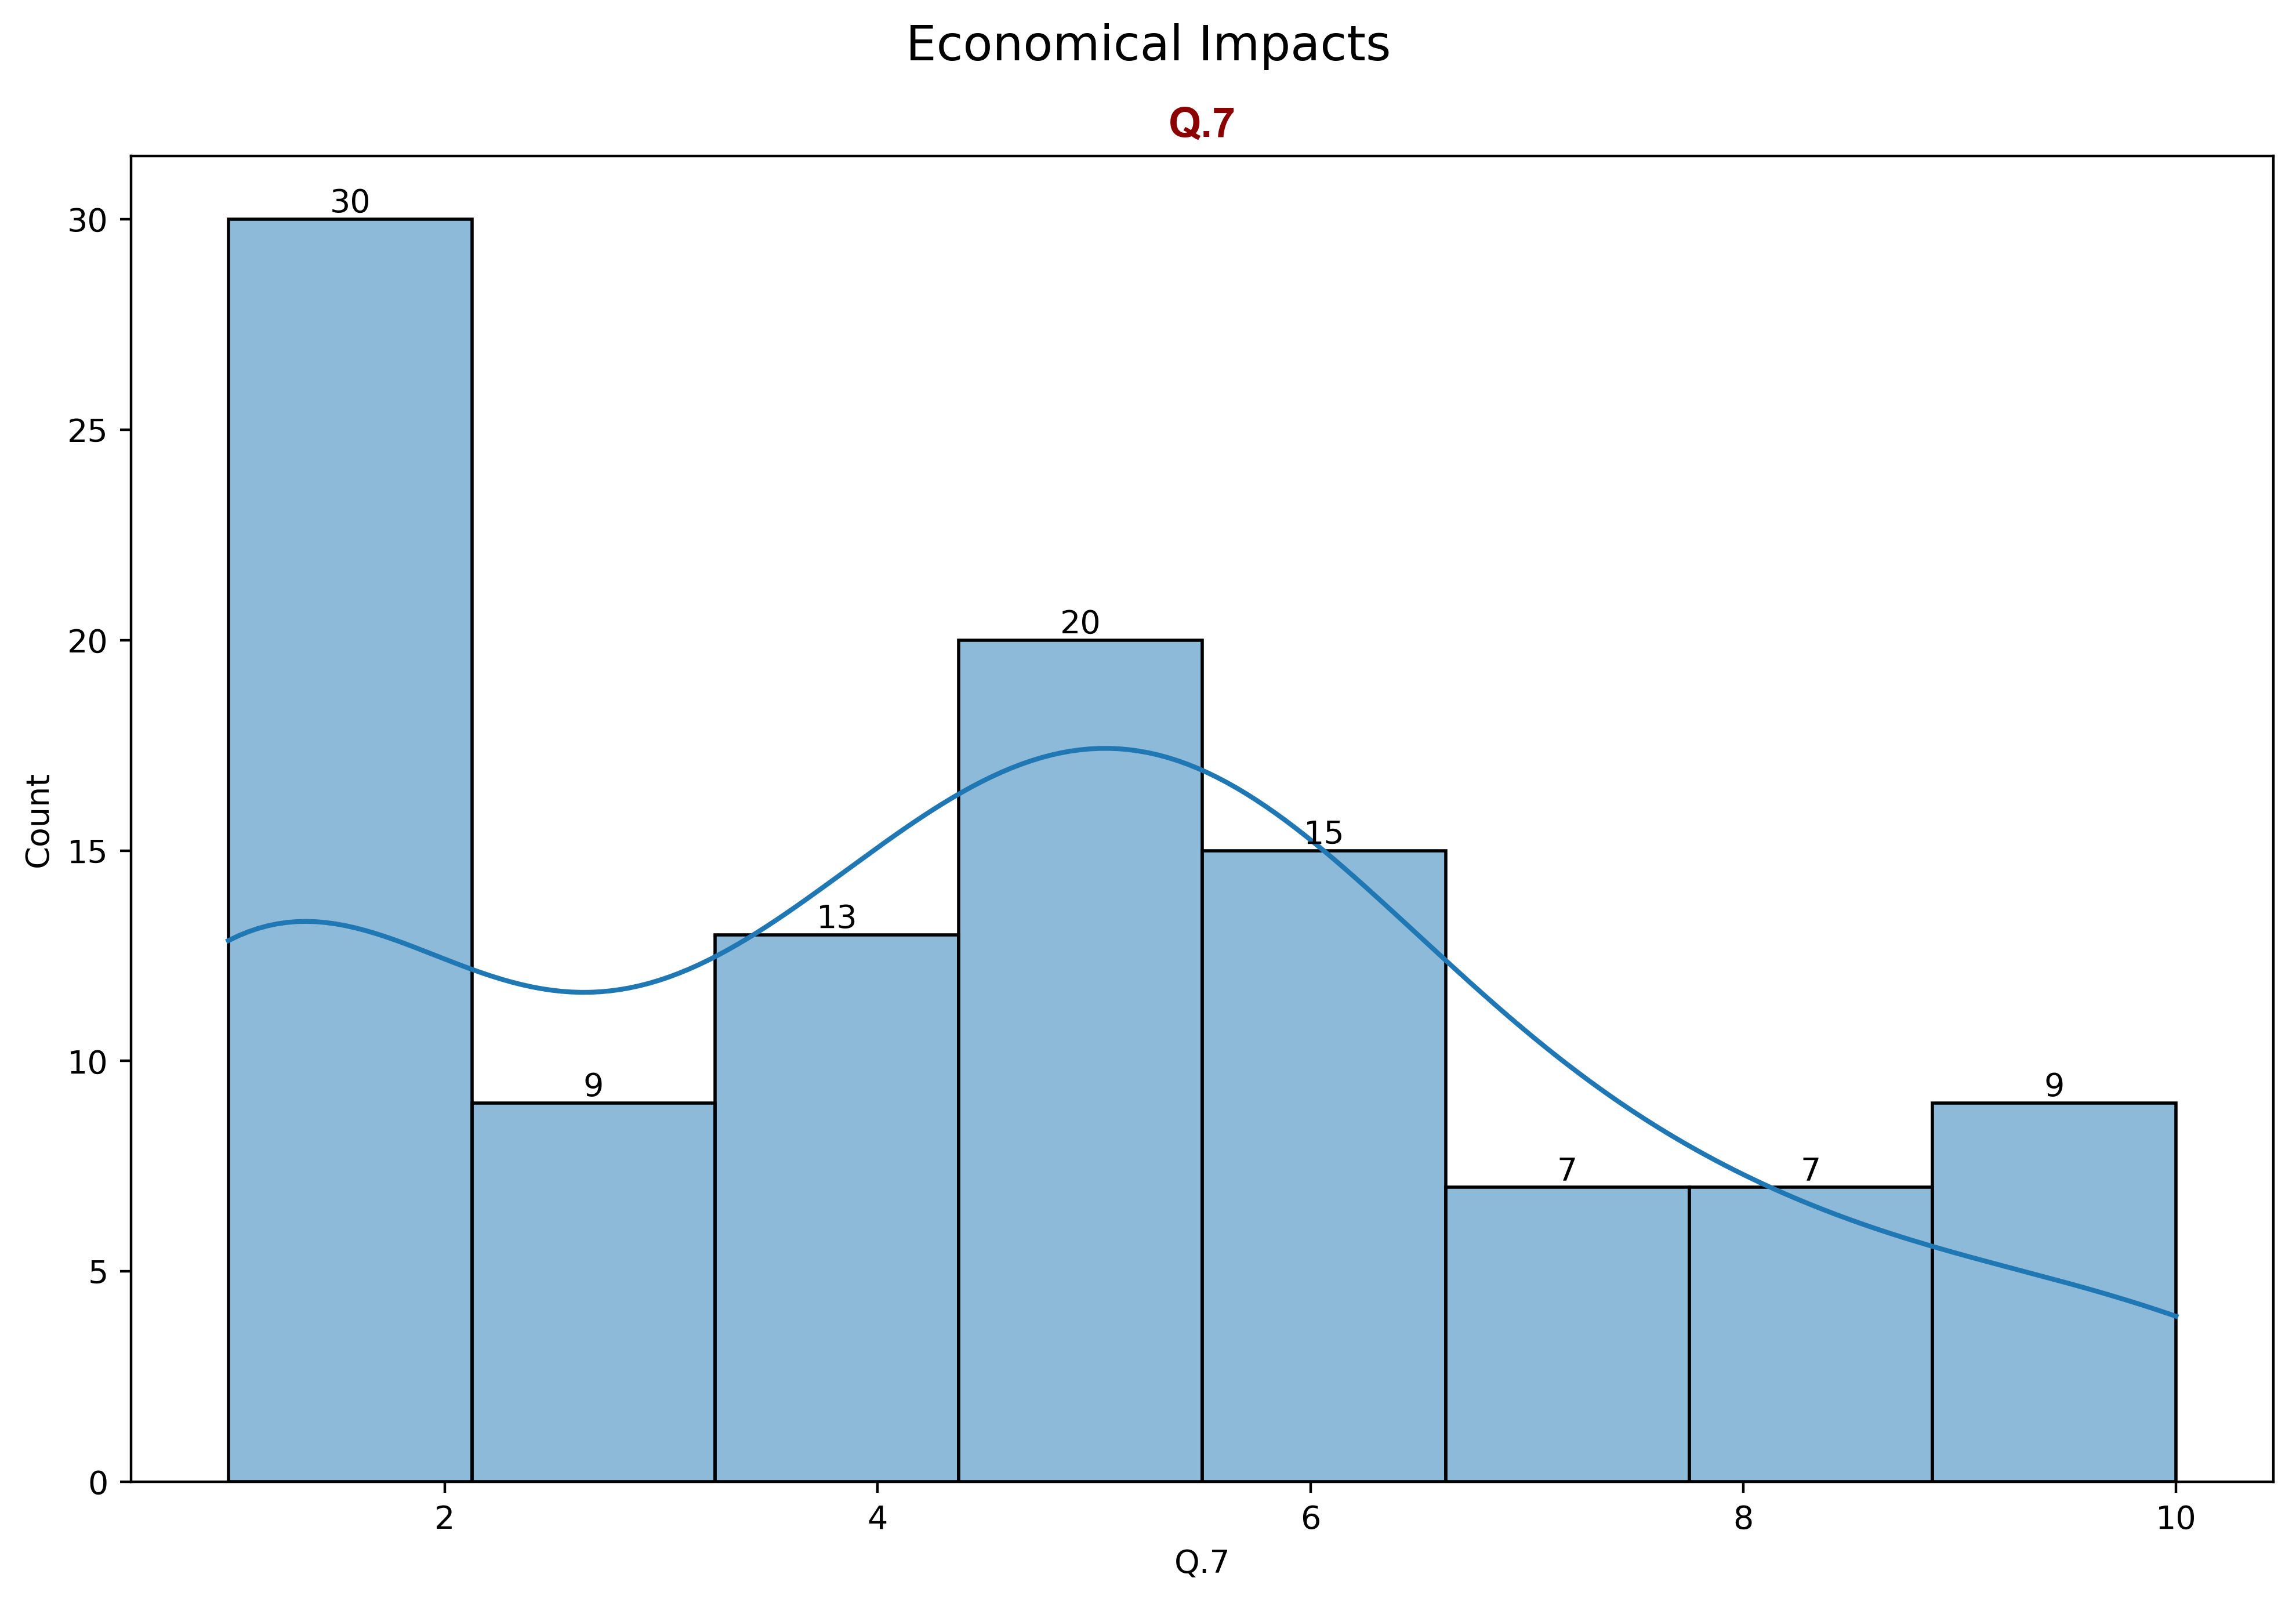

In [42]:
baslik_font={'family':'arial','color':'darkred','weight':'bold','size':13}
eksen_font={'family':'arial','color':'darkblue','weight':'bold','size':10}
plt.figure(figsize=(10,7),dpi=400)
for i,col in enumerate(econ.drop(columns=['Q.11'],axis=1).head()):
    plt.subplot(1,1,i+1)
    ax=sns.histplot(econ[col],kde=True)
    plt.title(col,fontdict=baslik_font)
    for container in ax.containers:
        ax.bar_label(container)
plt.suptitle('Economical Impacts', fontsize=15)
plt.tight_layout()
plt.show()

In [43]:
print('Out of ',final_mc_1.sum()[0].astype(int))
econ_mc_1=final_mc_1.loc[['Streamlined administrative tasks','Faster and more efficient healthcare delivery','No significant benefits']].sum()
econ_mc_1=(econ_mc_1[0]).astype(int)
print(econ_mc_1,"Number of times Economical impact and its related effect was chosen")
print(final_mc_1.loc[['Streamlined administrative tasks','Faster and more efficient healthcare delivery','No significant benefits']])

Out of  204
117 Number of times Economical impact and its related effect was chosen
                                               Total number particular option is chosen
Streamlined administrative tasks                                                   40.0
Faster and more efficient healthcare delivery                                      55.0
No significant benefits                                                            22.0


array([<AxesSubplot:ylabel=' '>], dtype=object)

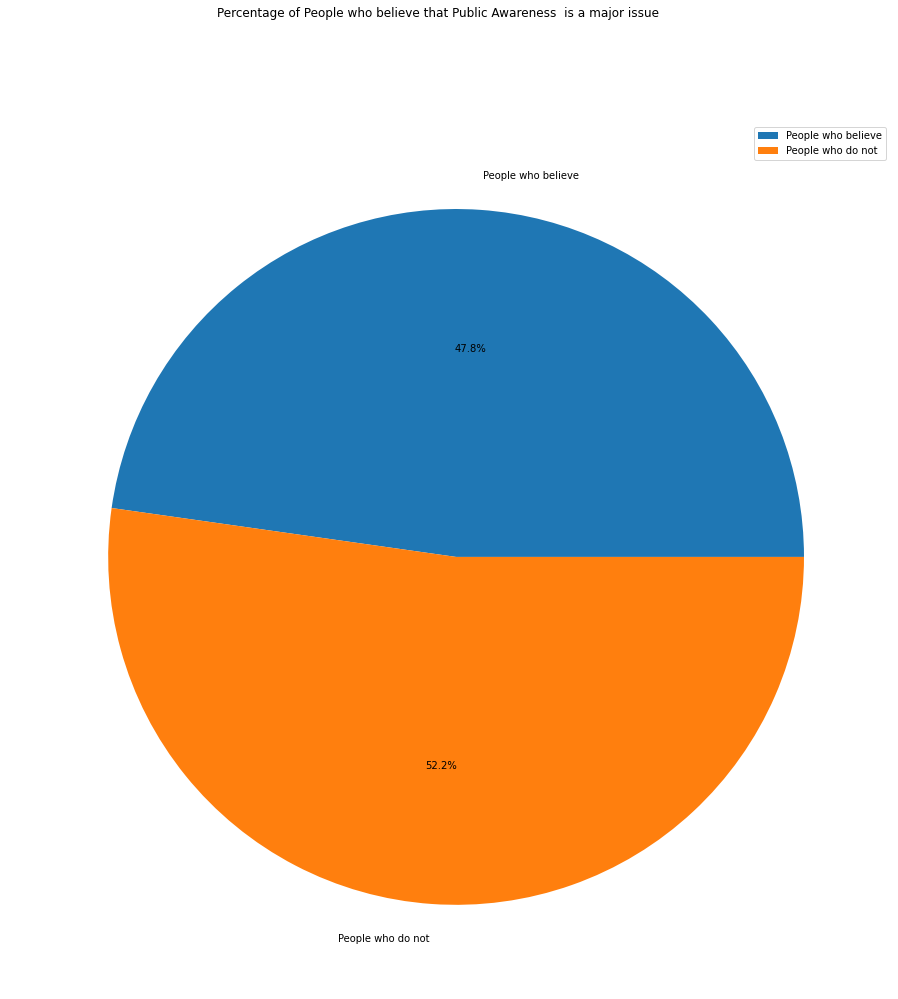

In [60]:
pie_chartx=[econ_mc_1,final_mc_2.sum()[0].astype(int)-aware_mc_2]
pd.DataFrame(pie_chartx,columns=[' ']).plot(figsize=(20,16),kind="pie",subplots=True,labels=['People who believe','People who do not'],autopct='%1.1f%%',title="Percentage of People who believe that Public Awareness  is a major issue")

array([<AxesSubplot:ylabel='Total number particular option is chosen'>],
      dtype=object)

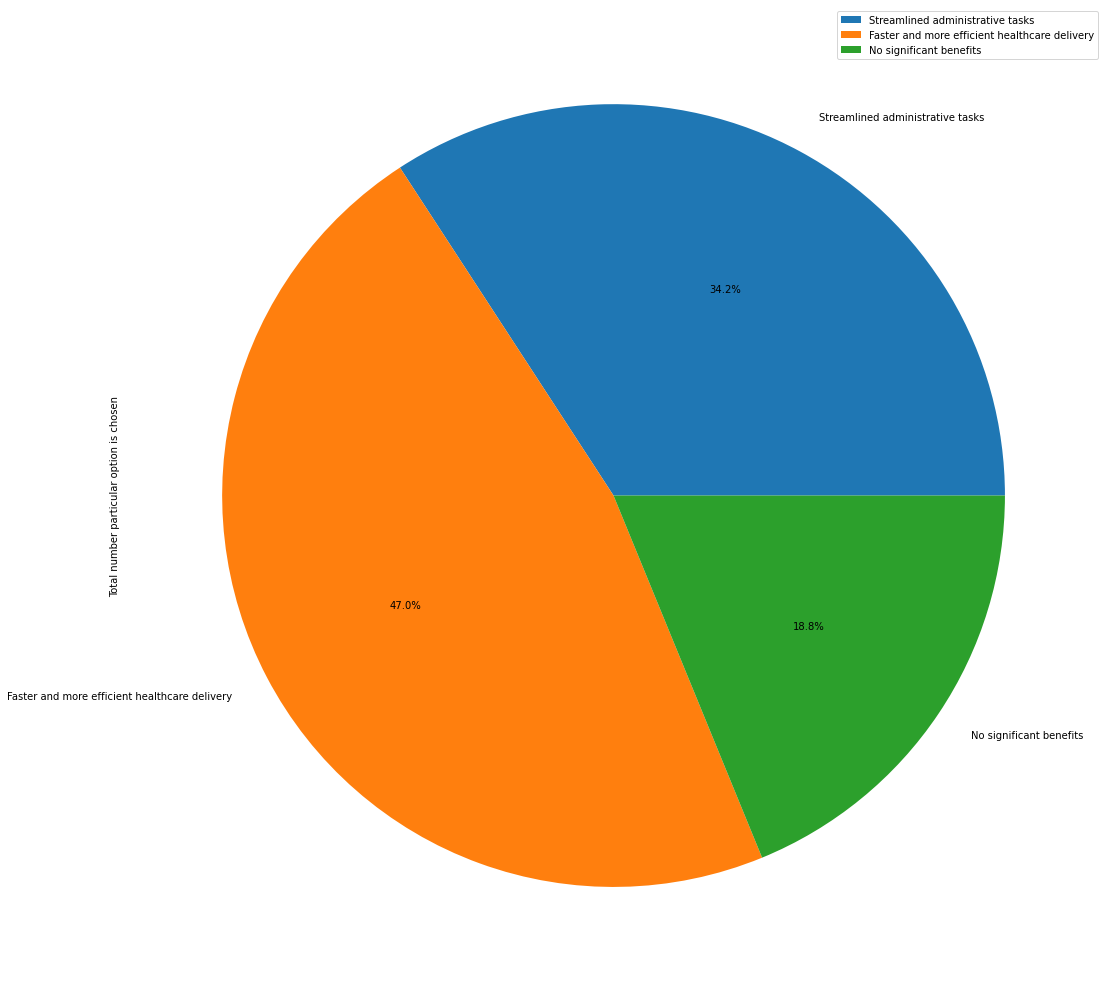

In [63]:
final_mc_1.loc[['Streamlined administrative tasks','Faster and more efficient healthcare delivery','No significant benefits']].plot(figsize=(20,18),kind="pie",subplots=True,autopct='%1.1f%%')

In [44]:
compare=pd.crosstab(econ['Q.7'],econ['Q.11']) 
compare.columns=['No','Yes']
compare

,No,Yes
Q.7,,
1,11,14
2,0,5
3,1,8
4,2,11
5,4,16
6,1,14
7,2,5
8,0,7
9,0,3


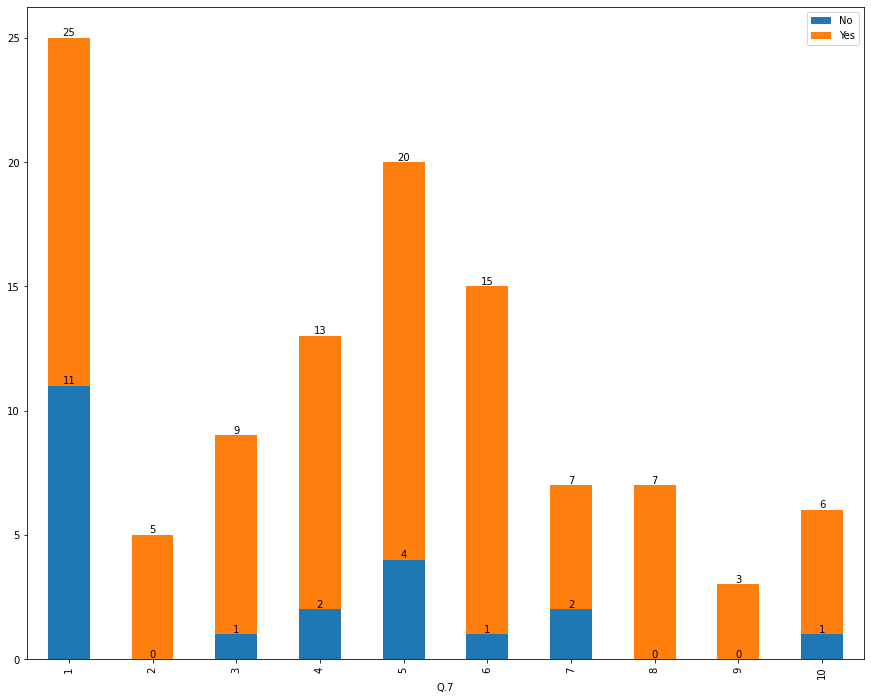

In [45]:
plt.figsize=(15,12)
stacked = compare.stack().reset_index().rename(columns={0:'value'})
ax=compare.plot(kind="bar",stacked=True,figsize=(15,12))
for container in ax.containers:
    ax.bar_label(container)

# Hypothesis Testing


Insights -<br>
1.Trust in AI driven Psychotherapy<br>
2.Attitudes Toward Integrating AI Technology<br>
3.Public Awareness<br>
4.Impact on Human-to-Human Therapeutic Relationship<br>
5.Economic Implications<br>

In [46]:
from scipy import stats
from scipy.stats import f_oneway

stats.ttest_ind(trust['mean'], aware['mean'], equal_var=False)

Ttest_indResult(statistic=-3.507097394746816, pvalue=0.000557804607059855)

Null Hypothesis rejected and there is sufficient relation between trust scores and Public awareness scores

In [47]:
stats.ttest_ind(trust['mean'], impact['mean'], equal_var=False)

Ttest_indResult(statistic=-9.143489697361495, pvalue=6.775457525953724e-17)

Null Hypothesis rejected and there is sufficient relation between means of trust scores and Impace on Human Therapy awareness scores

In [48]:
f_oneway(trust['mean'],aware['mean'],impact['mean'])

F_onewayResult(statistic=39.38705110750467, pvalue=4.721394989476795e-16)

Null Hypothesis rejected and there is sufficient relation between means of Trust score, awaress and impact.

In [49]:
from scipy.stats import chi2_contingency
compare=pd.crosstab(aware['Q.8'],aware['Q.9'],rownames=['Q.8'], colnames=['Q.9']) 
compare.columns=['0-2hrs/week','2-4hrs/week','More than 4hrs/week']
compare.index=['No','Yes']
stat, p, dof, expected = chi2_contingency(compare)
print("The degree of freedom is: ", dof)

The degree of freedom is:  2


In [50]:
prob = 0.95
alpha = 1.0 - prob
print('The alpha/significance level = %.3f' % alpha)
print('The p-value is = %.2f' % p)
if p <= alpha:
    print('Reject the Null Hypothesis (Reject H0)')
else:
    print('Accept the Null Hypothesis (Do not reject H0)')

The alpha/significance level = 0.050
The p-value is = 0.03
Reject the Null Hypothesis (Reject H0)
